In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ROOT = f'/home/alexander/JupyterLab/Measurments/Measurments_2021/21.04.06/'
IMAGE_ROOT = f'/home/alexander/JupyterLab/Measurments/Measurments_2021/Images/21.04.06/'
TEST_FILE = f'/home/alexander/Documents/Measurments/Measurments_2021/21.04.06/seq1/6_Vsd_f_005.csv'
TEST_FILE_G = f'/home/alexander/JupyterLab/Measurments/Measurments_2021/21.04.06/seq2/1_Vg_f_000.csv'

In [3]:
def V_type(path):
    filename = os.path.basename(path)
    return filename.split('_')[1]

In [4]:
def transistor_number(path):
    filename = os.path.basename(path)
    return filename.split('_')[0]

In [5]:
def substrate_number(path):
    foldername = os.path.basename(os.path.dirname(path))
    return foldername[-1]

In [6]:
def gate_voltage(path):
    fline = open(path, 'r').readline().rstrip()
    return float(fline.split(' ')[-1])

In [7]:
def sd_voltage(path):
    fline = open(path, 'r').readline().rstrip()
    return float(fline.split(' ')[-1])

In [8]:
def read_data(path):
    file = open(path, 'r')
    x = []
    y = []
    for i, line in enumerate(file):
        if i>4:
            p = line.split(',')
            x.append(float(p[0]))
            y.append(float(p[1]))
    file.close()
    return x, y

In [9]:
def data_frame(root, files):
    V_types = []
    substrate_numbers = []
    transistor_numbers = []
    paths = []
    for file in files:
        filename = os.path.join(root, file)
        paths.append(filename)
        V_types.append(V_type(filename))
        substrate_numbers.append(substrate_number(filename))
        transistor_numbers.append(transistor_number(filename))
    constructor_list = [substrate_numbers, transistor_numbers, V_types, paths]
    df = pd.DataFrame(constructor_list, index=['substrate', 'transistor', 'V_type', 'path']).T
    return df

# С характеристиками гейта

  substrate transistor                                               path
0         4          1  [/home/alexander/JupyterLab/Measurments/Measur...
1.0
5.0
7.0
0.0
0.0
substrate 4, transistor 1
  substrate transistor                                               path
1         4          2  [/home/alexander/JupyterLab/Measurments/Measur...
5.0
0.0
0.0
6.0
4.0
3.0
1.0
2.0
substrate 4, transistor 2
  substrate transistor                                               path
2         4          3  [/home/alexander/JupyterLab/Measurments/Measur...
6.0
4.0
1.0
0.0
0.0
3.0
5.0
2.0
substrate 4, transistor 3
  substrate transistor                                               path
3         4          4  [/home/alexander/JupyterLab/Measurments/Measur...
0.0
2.0
1.0
3.0
0.0
substrate 4, transistor 4
  substrate transistor                                               path
4         4          5  [/home/alexander/JupyterLab/Measurments/Measur...
5.0
4.0
0.0
3.0
0.0
10.0
2.0
8.0
7.0
1.0
6.0
9.0
sub

<ipython-input-12-b701eba59a3f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))


substrate 2, transistor 5
  substrate transistor                                               path
5         2          6  [/home/alexander/JupyterLab/Measurments/Measur...
0.0
0.0
2.0
6.0
5.0
1.0
10.0
3.0
4.0
9.0
8.0
0.0
7.0
substrate 2, transistor 6
  substrate transistor                                               path
6         2          7  [/home/alexander/JupyterLab/Measurments/Measur...
0.0
5.0
1.0
2.0
0.0
substrate 2, transistor 7
  substrate transistor                                               path
7         2          8  [/home/alexander/JupyterLab/Measurments/Measur...
5.0
0.0
0.0
substrate 2, transistor 8
  substrate transistor                                               path
0         3          1  [/home/alexander/JupyterLab/Measurments/Measur...
1.0
2.0
0.0
0.0


No handles with labels found to put in legend.


substrate 3, transistor 1
  substrate transistor                                               path
1         3          2  [/home/alexander/JupyterLab/Measurments/Measur...
9.0
4.0
2.0
10.0
0.0
8.0
0.0
6.0
10.0
5.0
9.0
8.0
5.0
7.0
7.0
1.0
3.0
substrate 3, transistor 2
  substrate transistor                                               path
2         3          3  [/home/alexander/JupyterLab/Measurments/Measur...
5.0
4.0
1.0
6.0
0.0
8.0
0.3
10.0
7.0
3.0
5.0
2.0
9.0
0.0
6.0
substrate 3, transistor 3
  substrate transistor                                               path
3         3          4  [/home/alexander/JupyterLab/Measurments/Measur...
10.0
7.0
0.0
2.0
1.0
9.0
8.0
3.0
0.0
5.0
6.0
4.0
substrate 3, transistor 4
  substrate transistor                                               path
4         3          5  [/home/alexander/JupyterLab/Measurments/Measur...
7.0
0.0
2.0
0.0
1.0
1.0
substrate 3, transistor 5
  substrate transistor                                               path


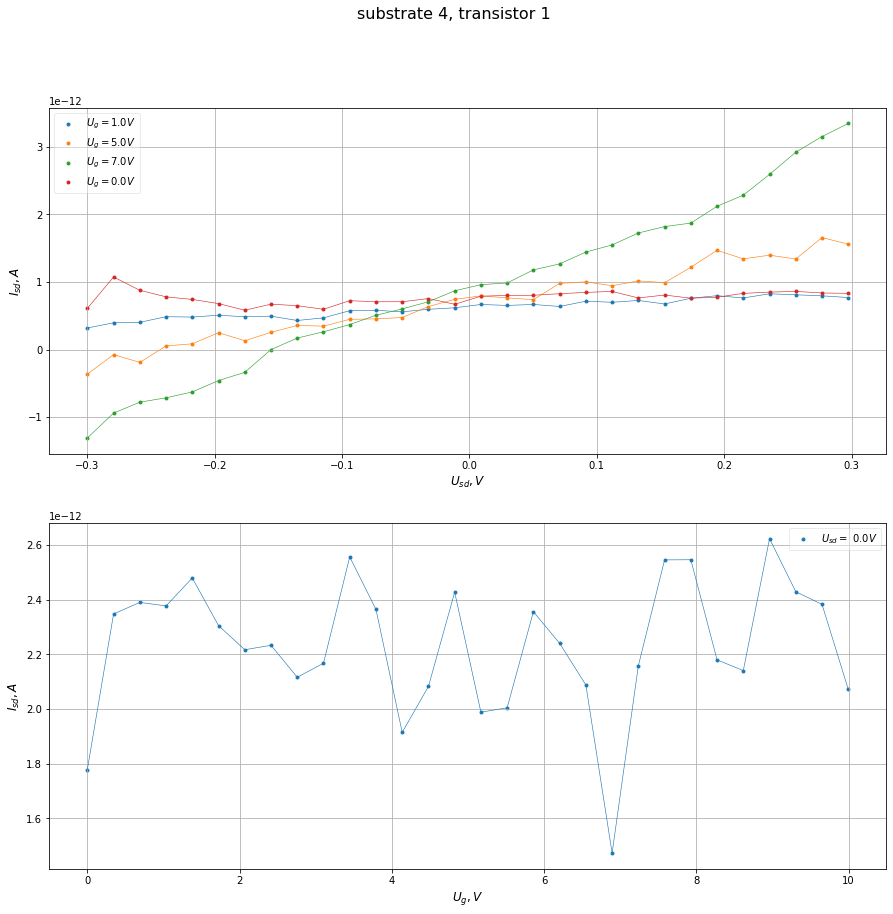

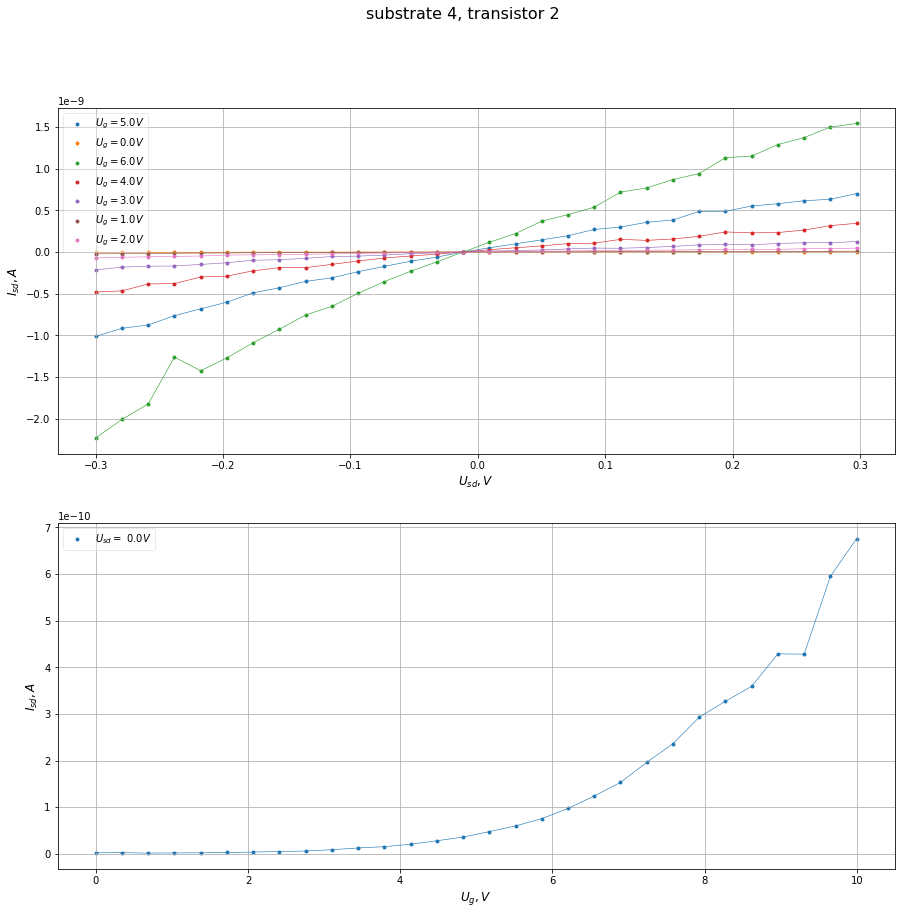

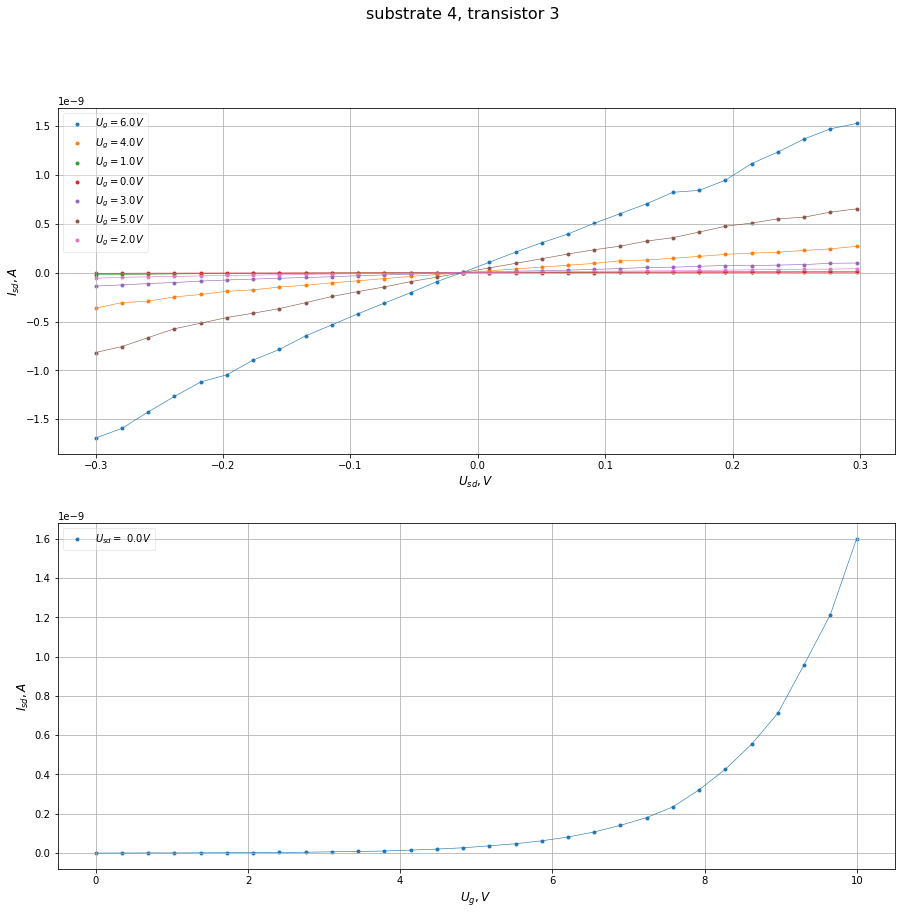

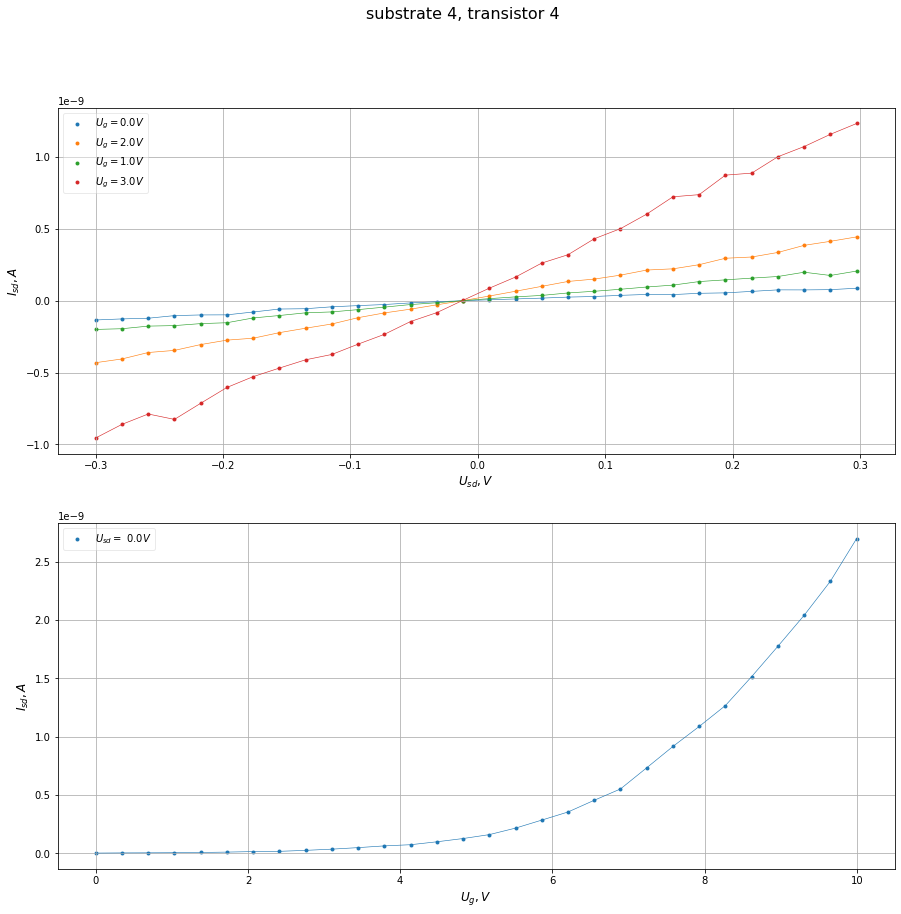

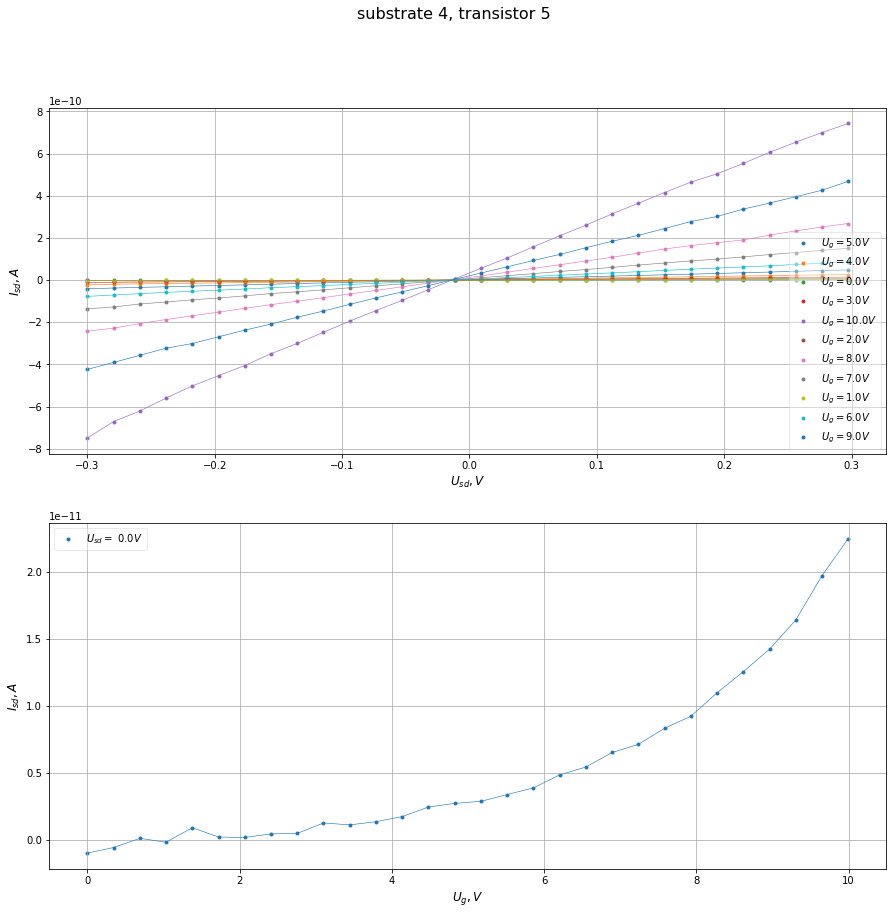

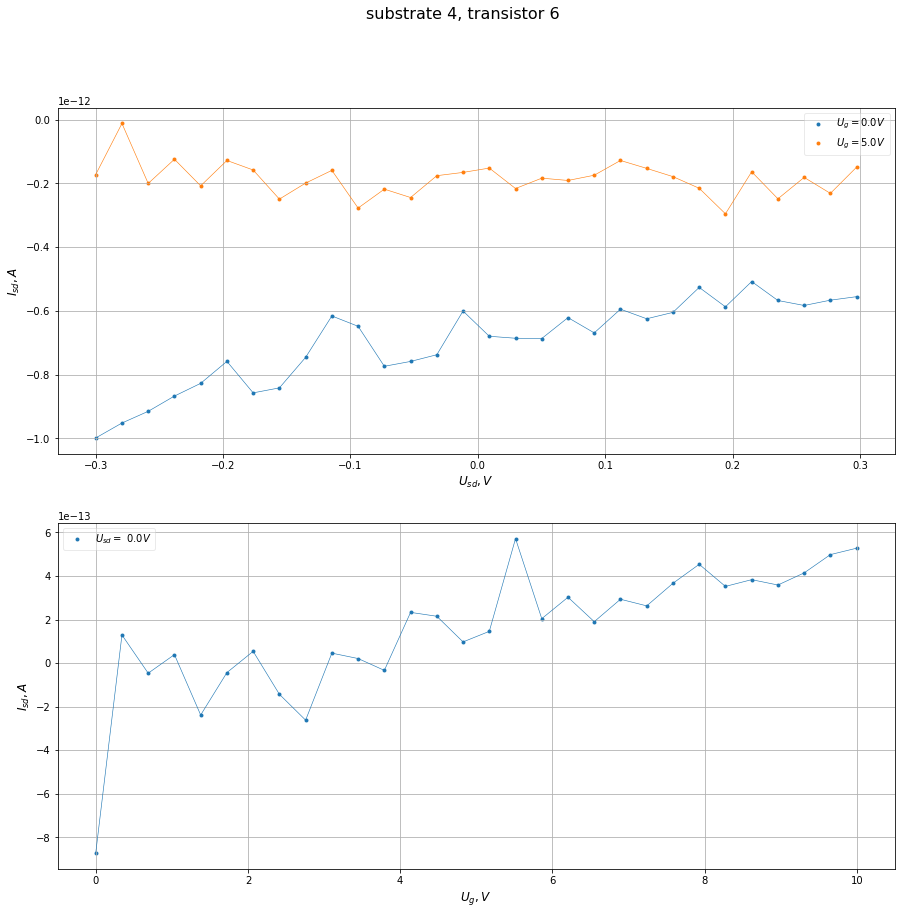

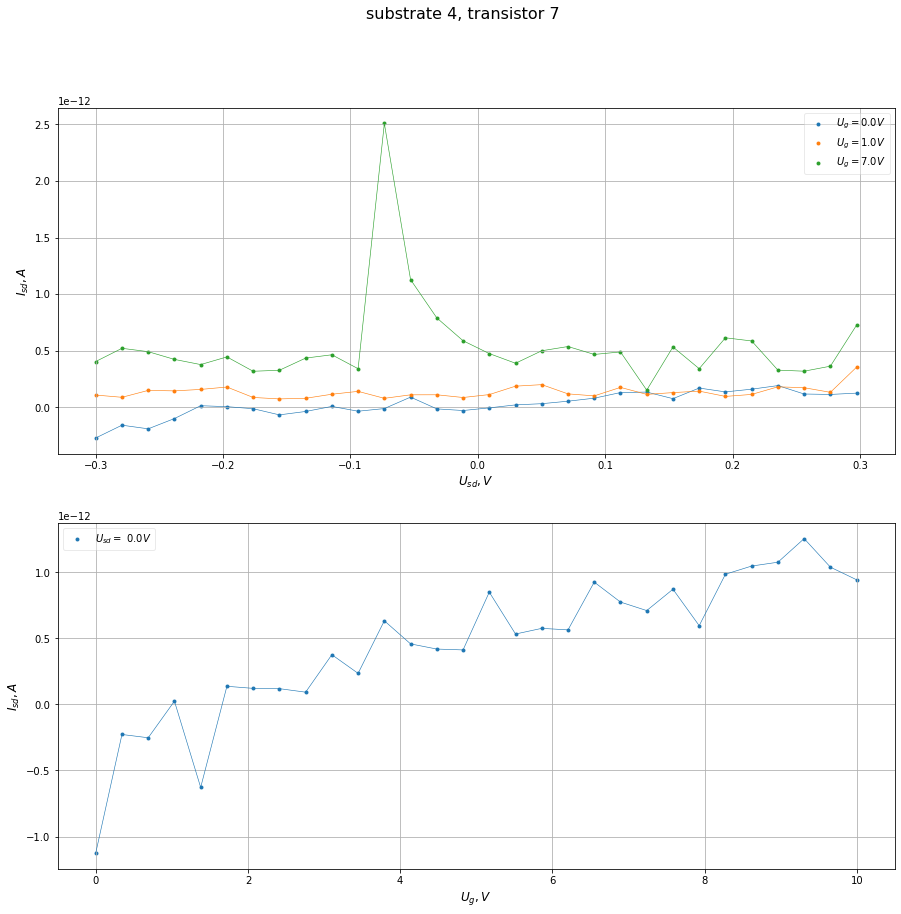

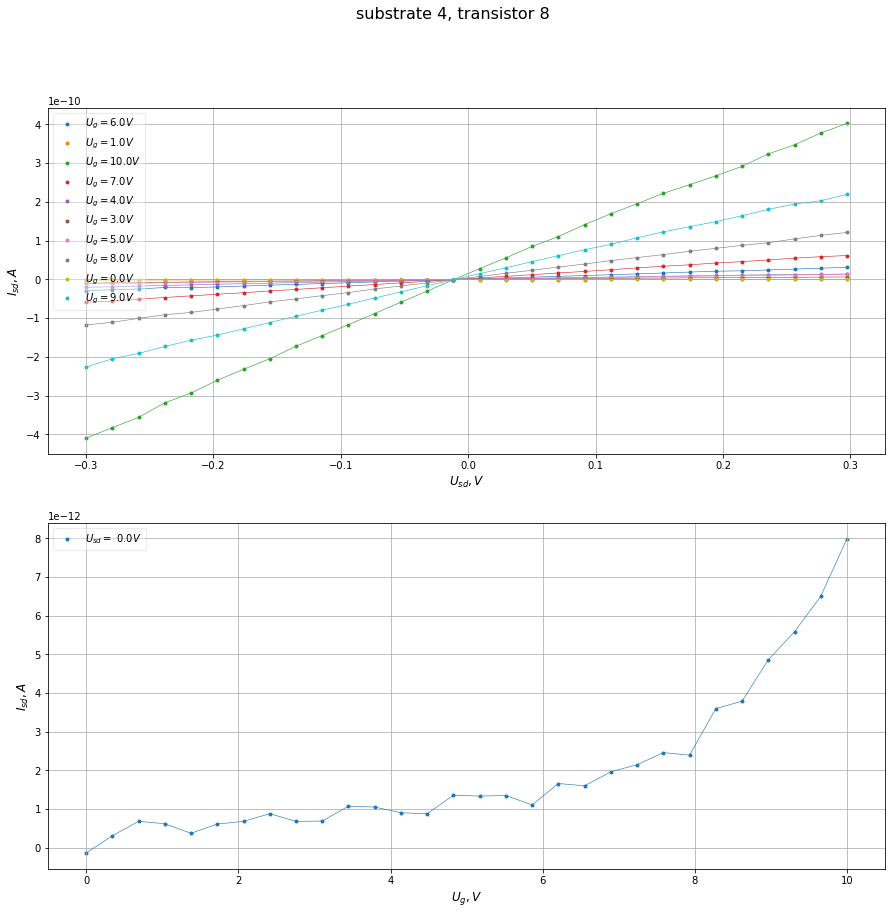

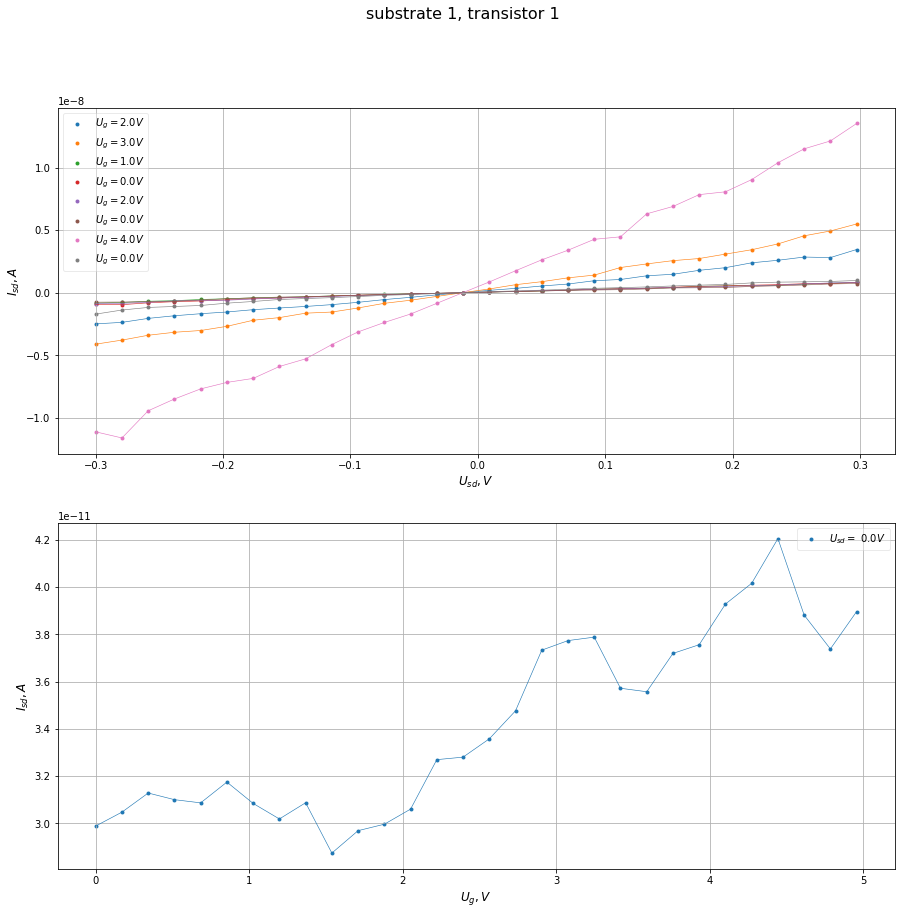

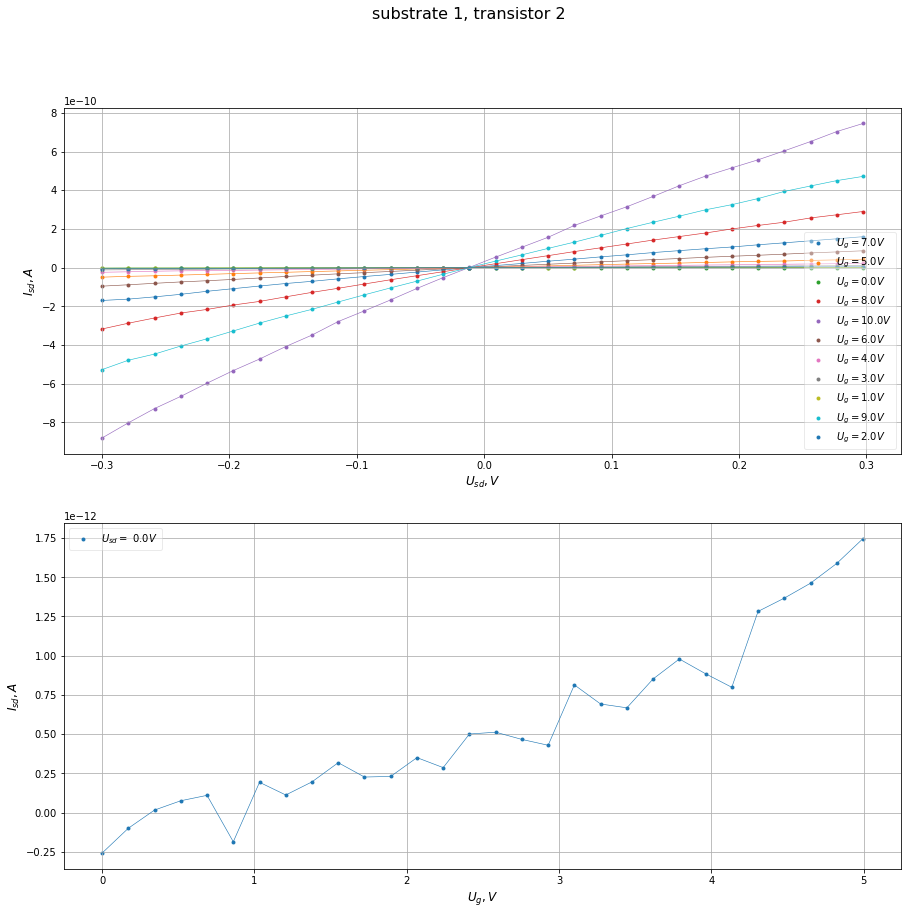

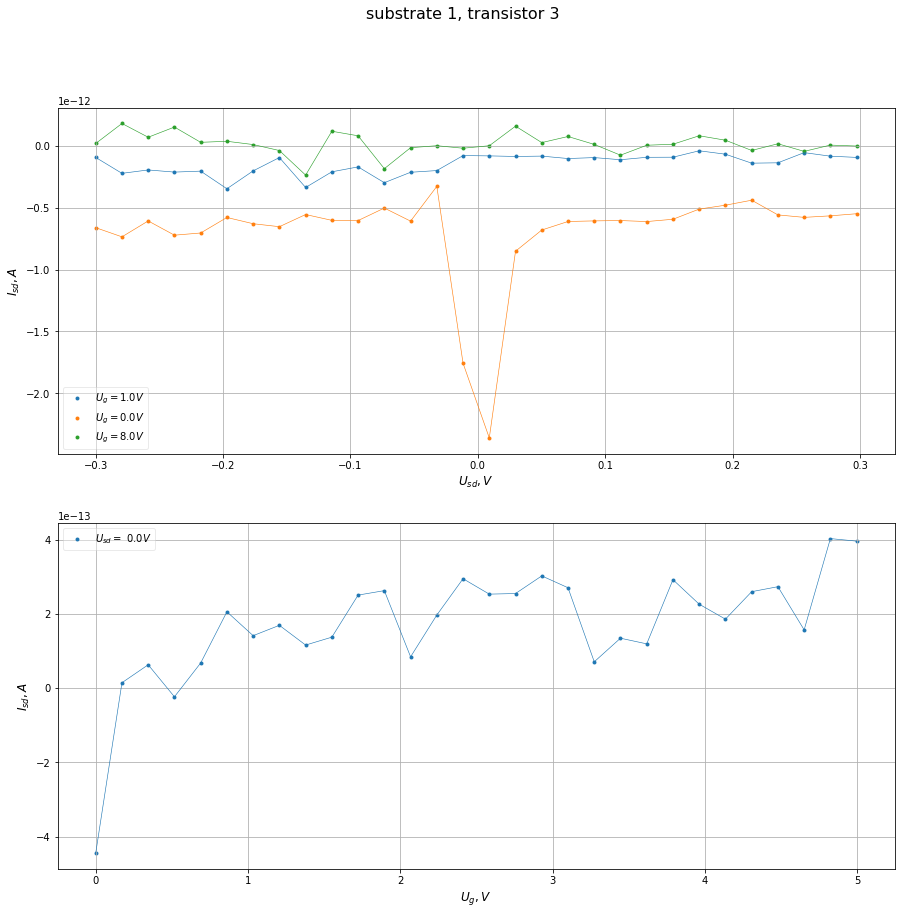

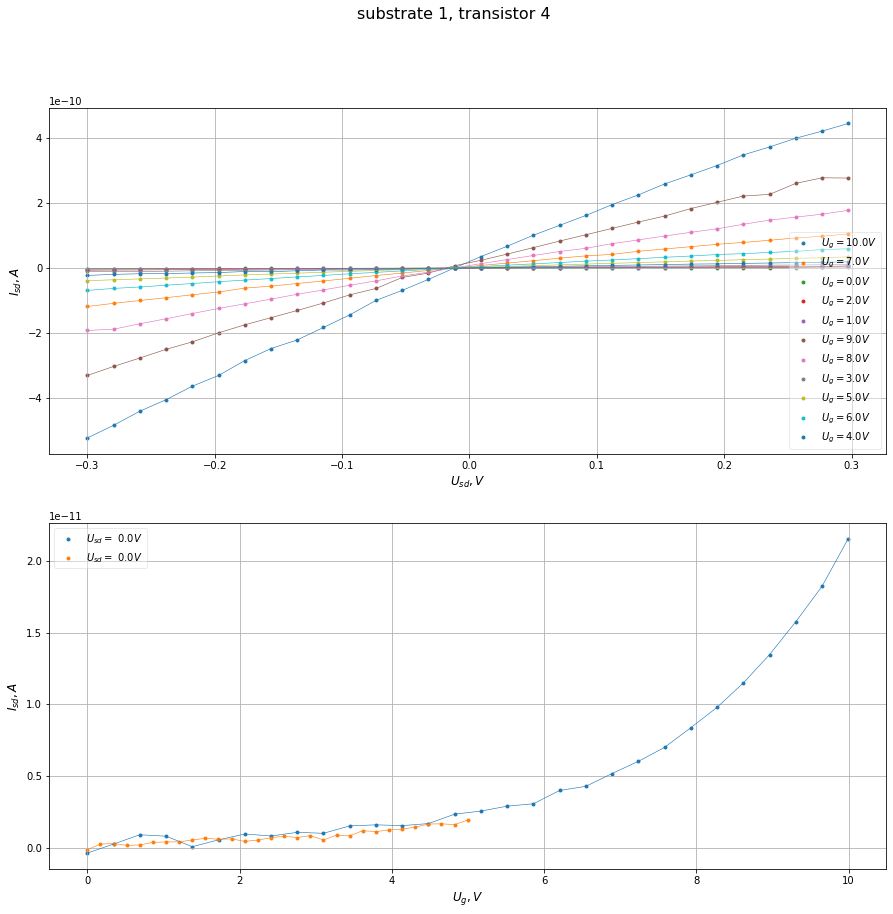

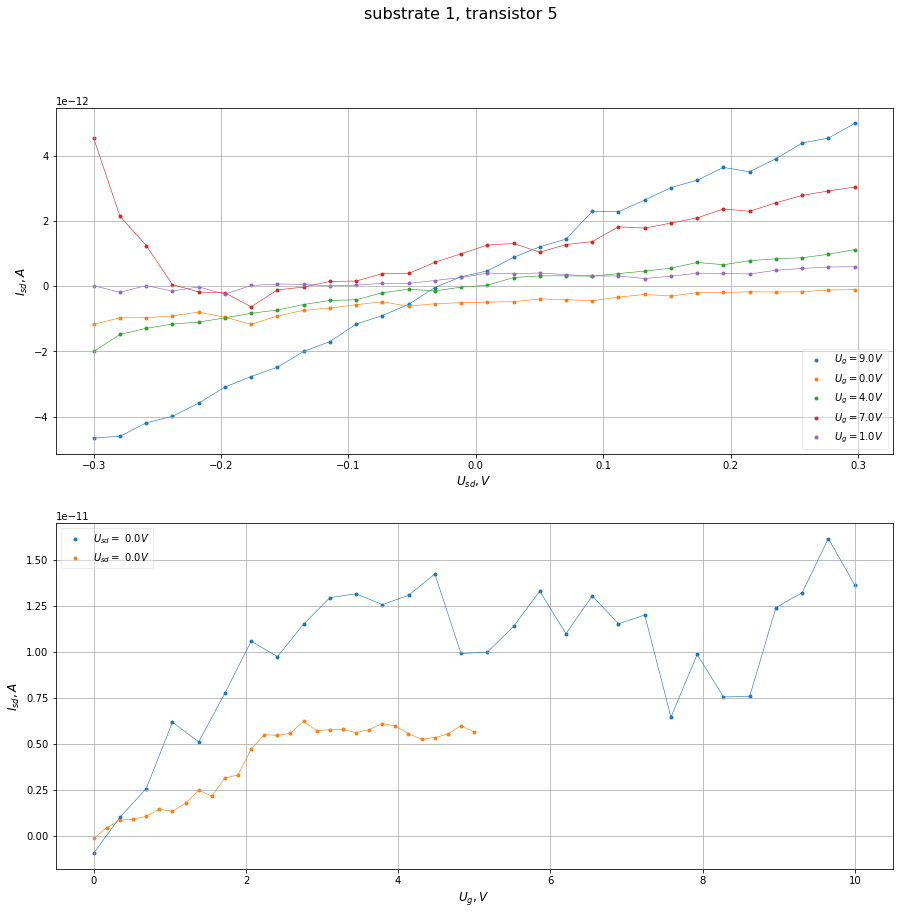

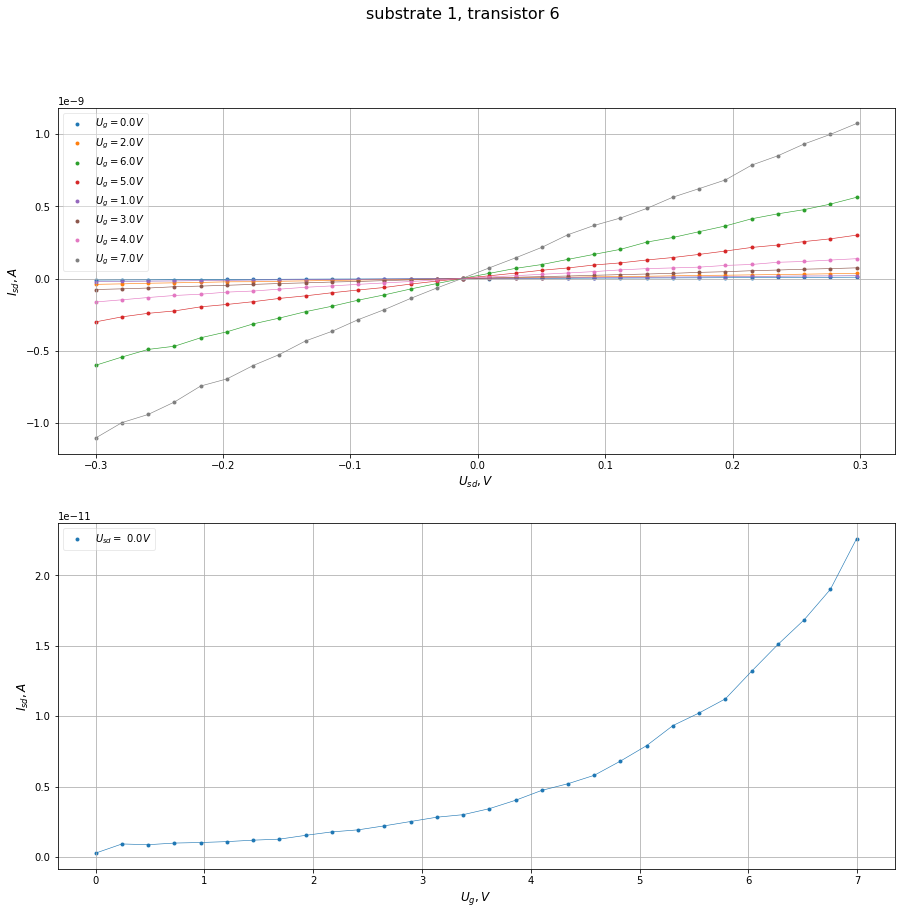

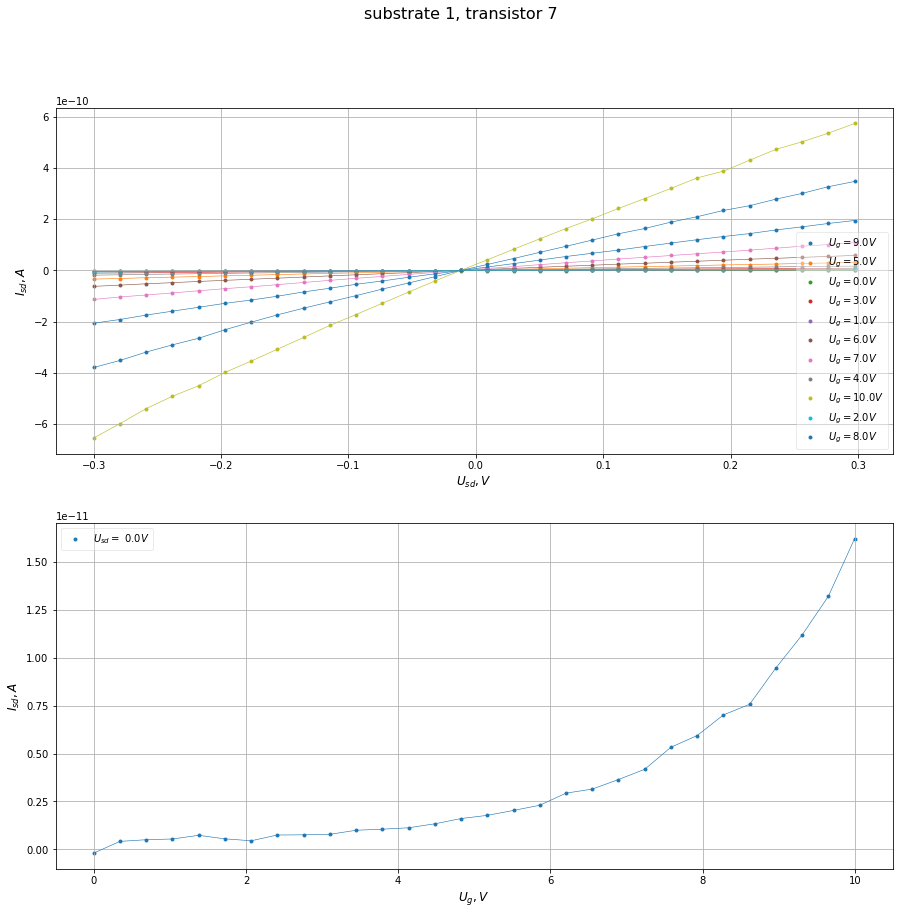

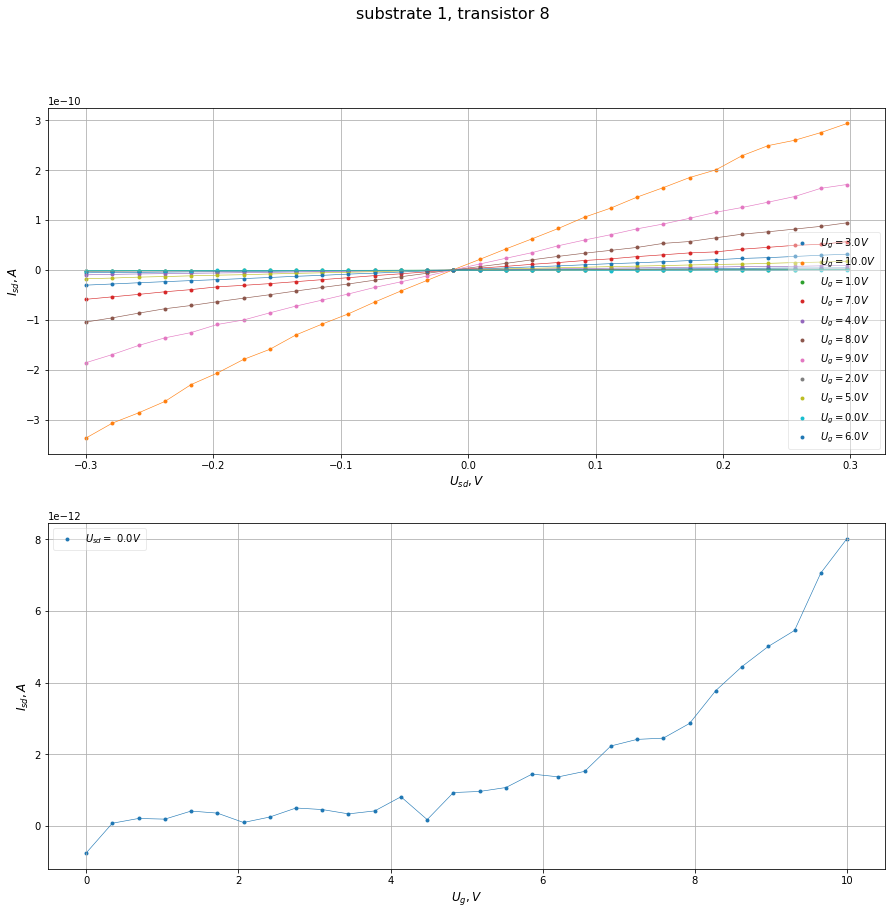

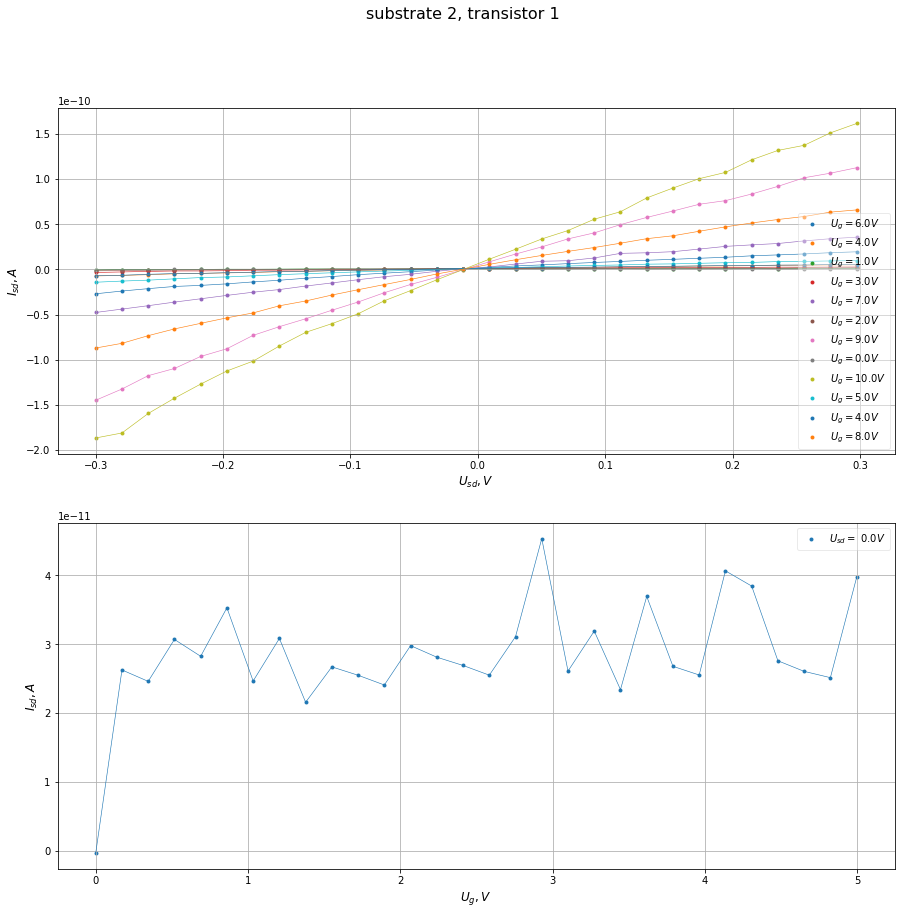

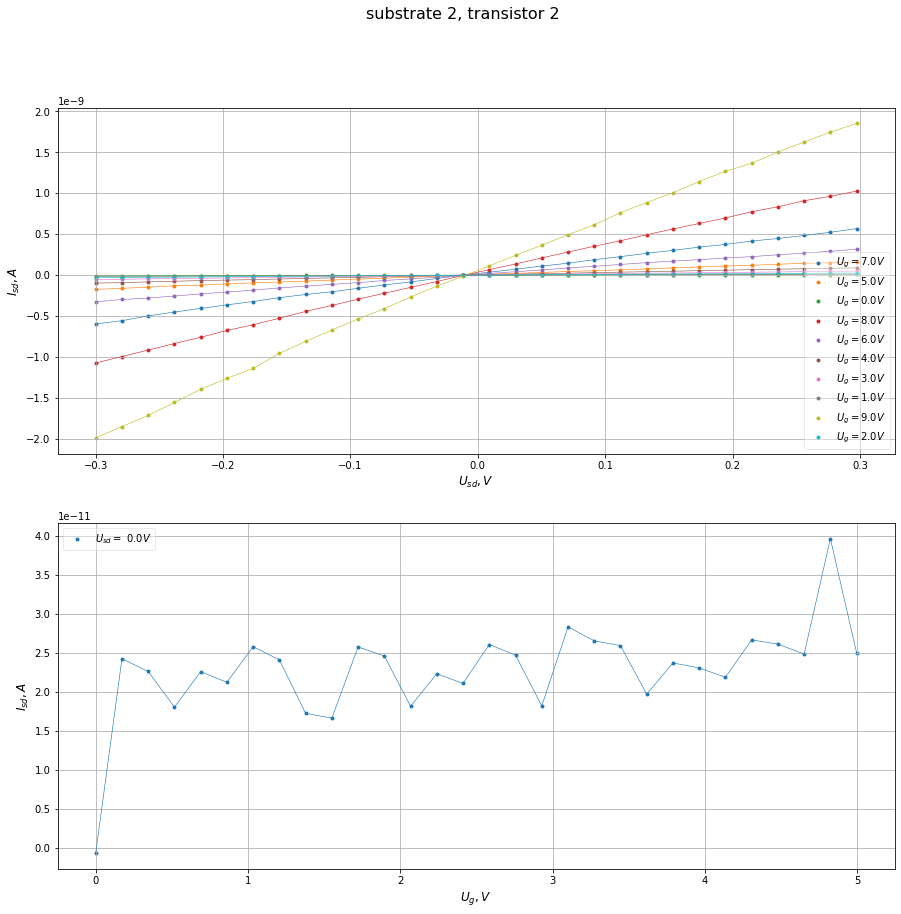

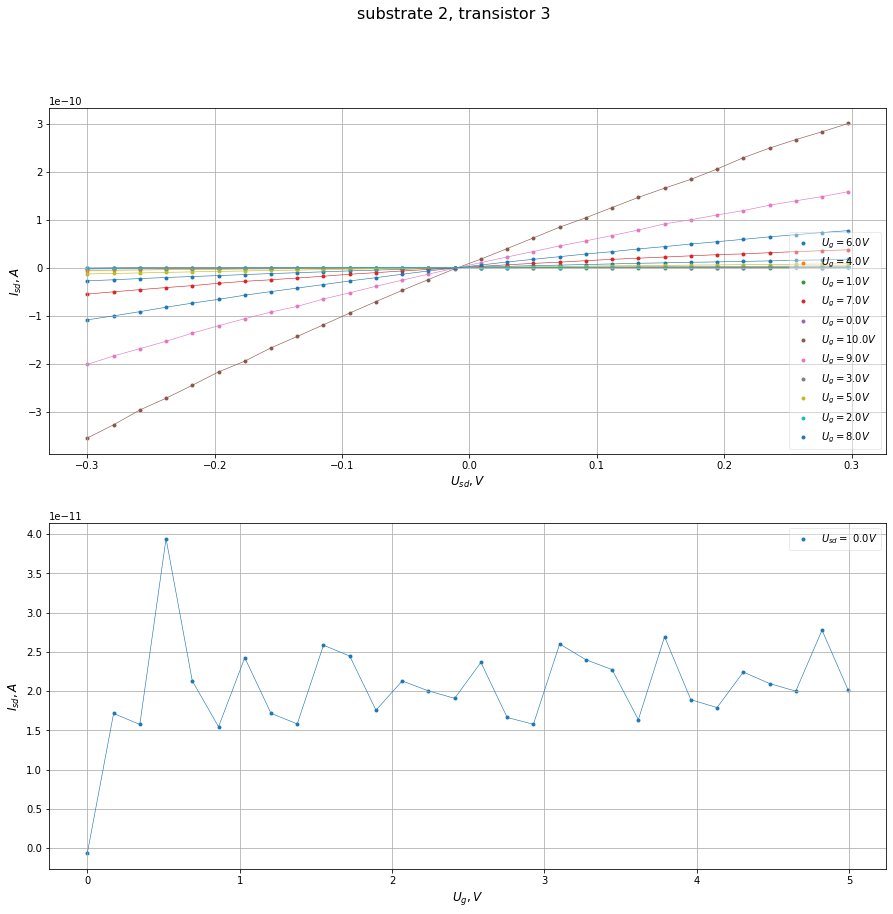

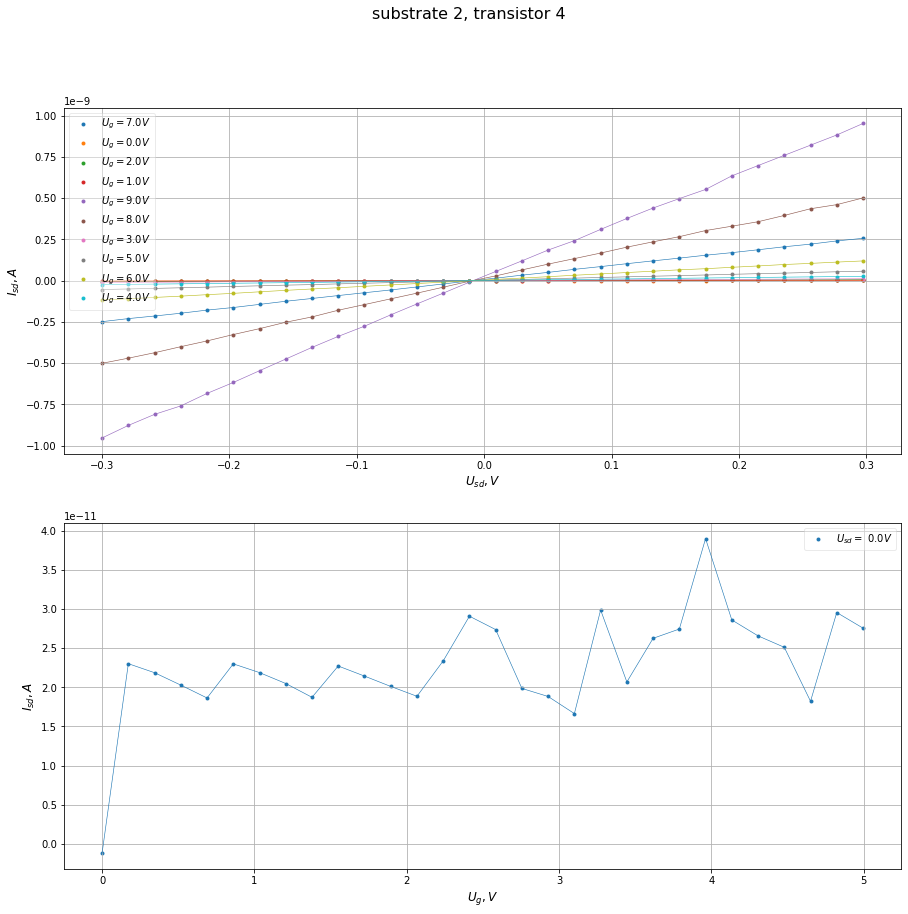

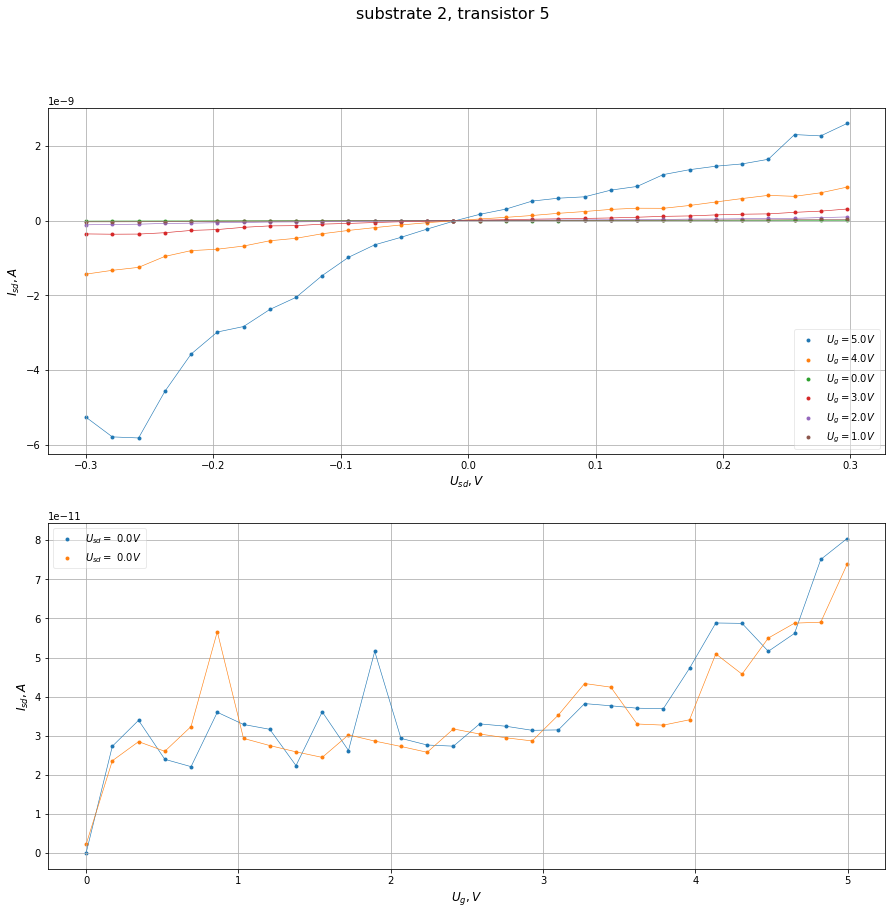

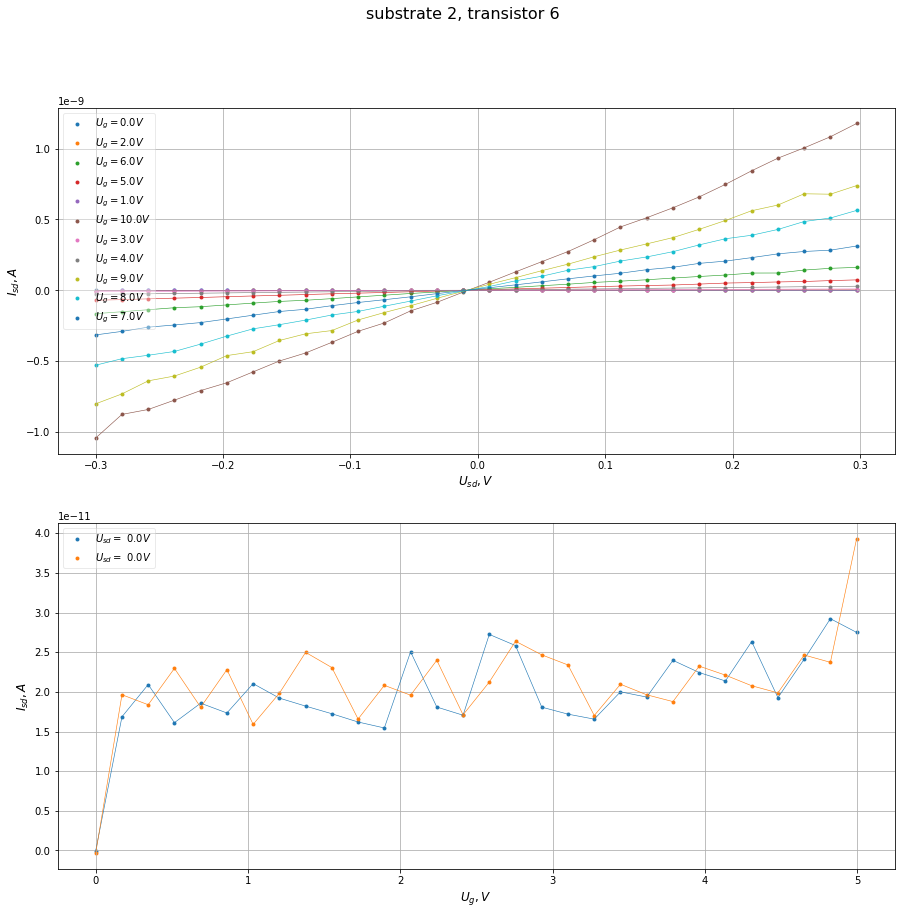

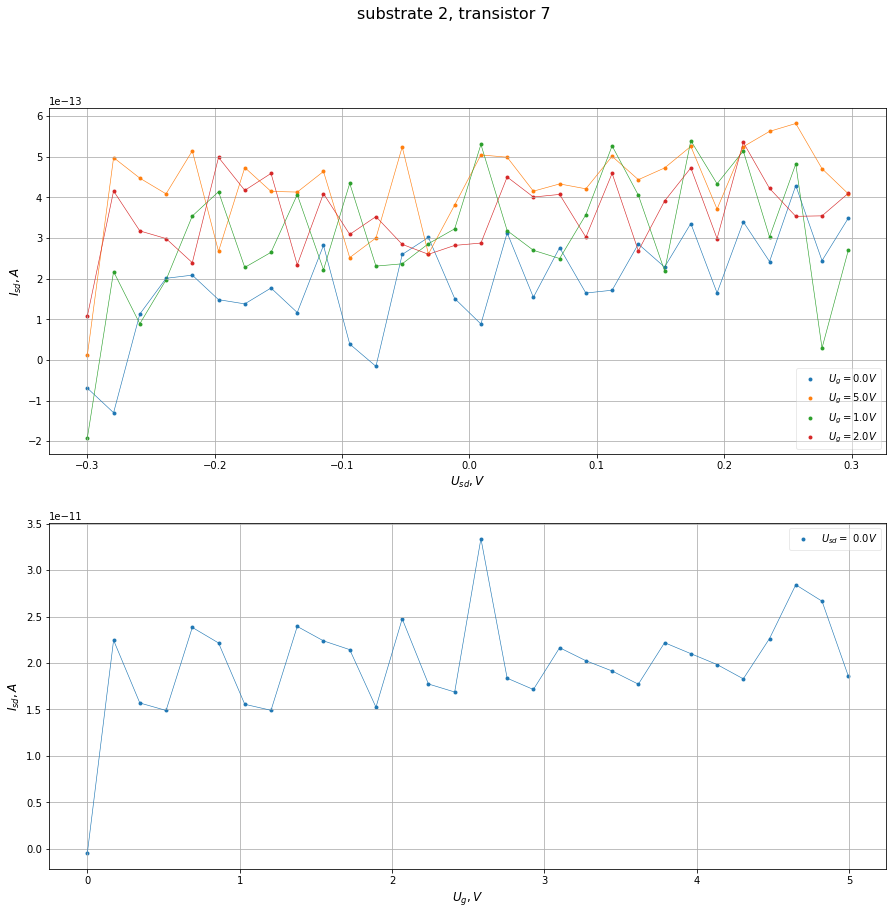

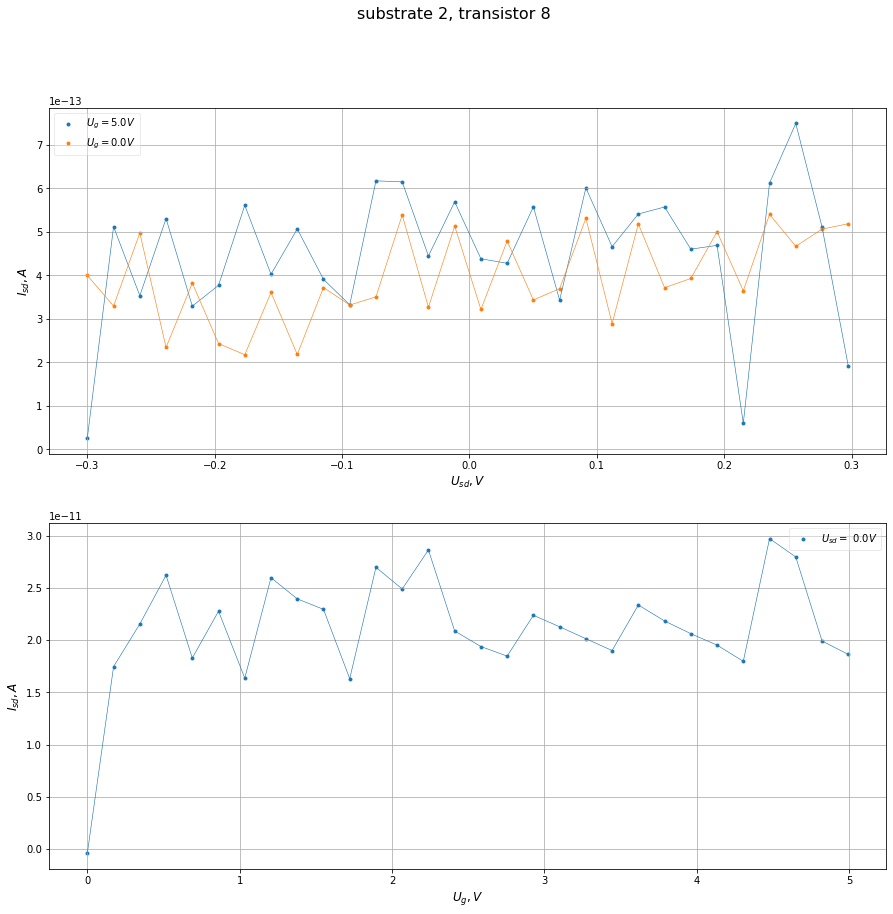

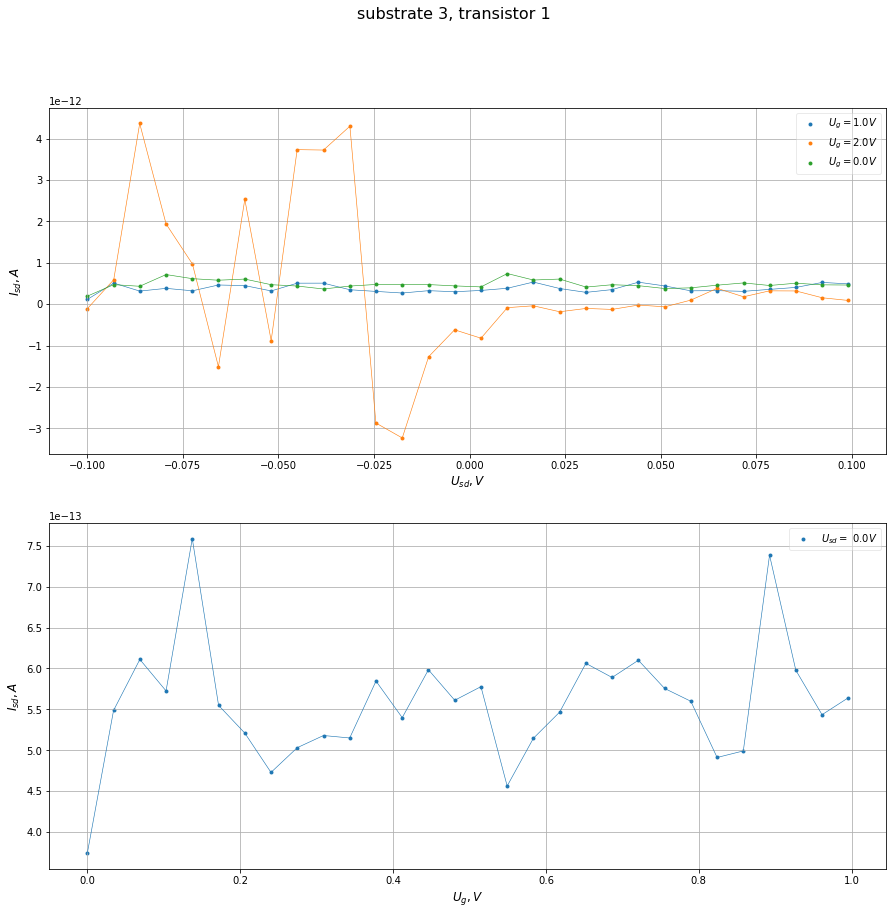

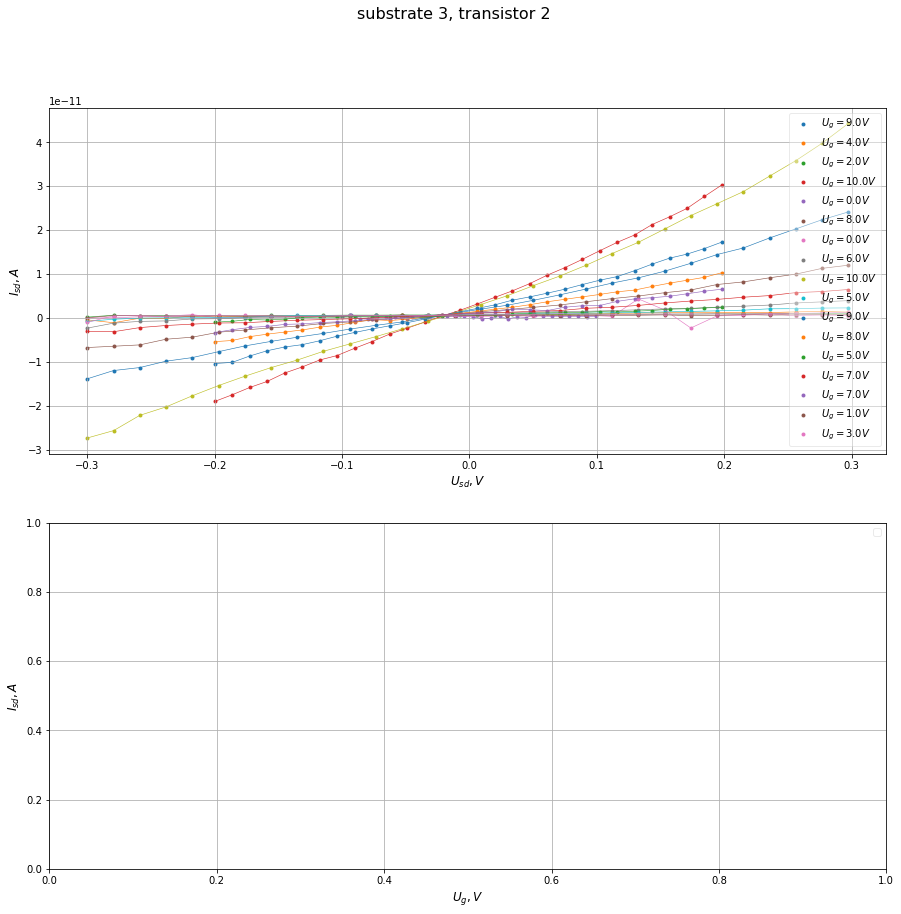

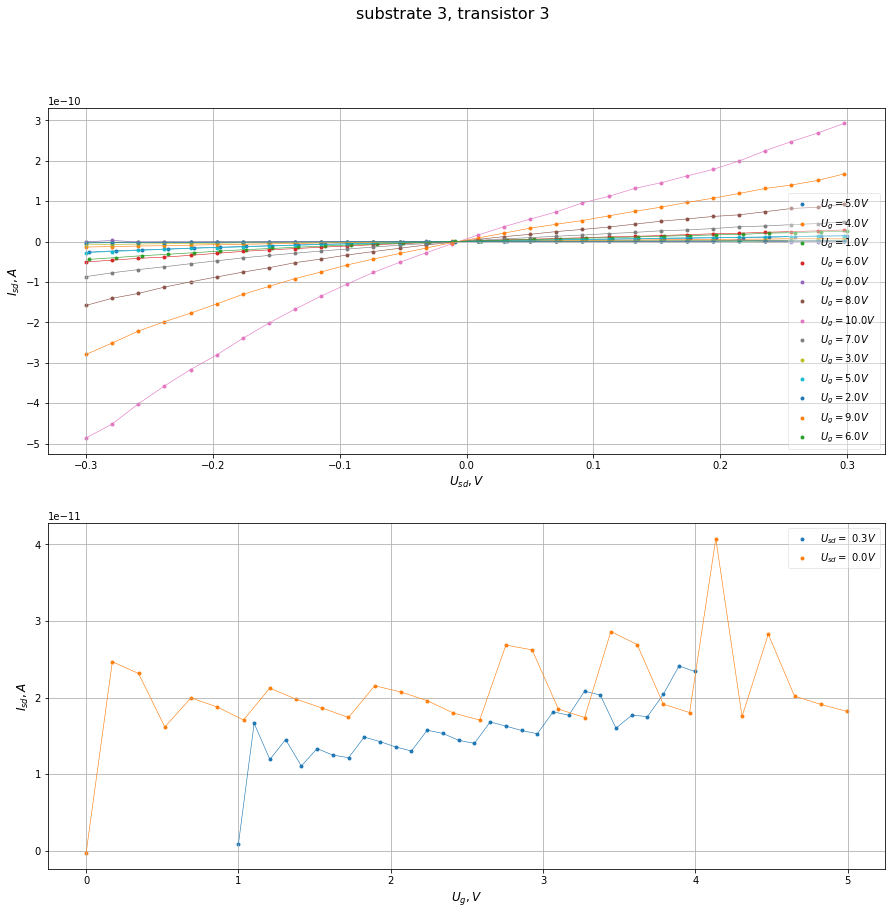

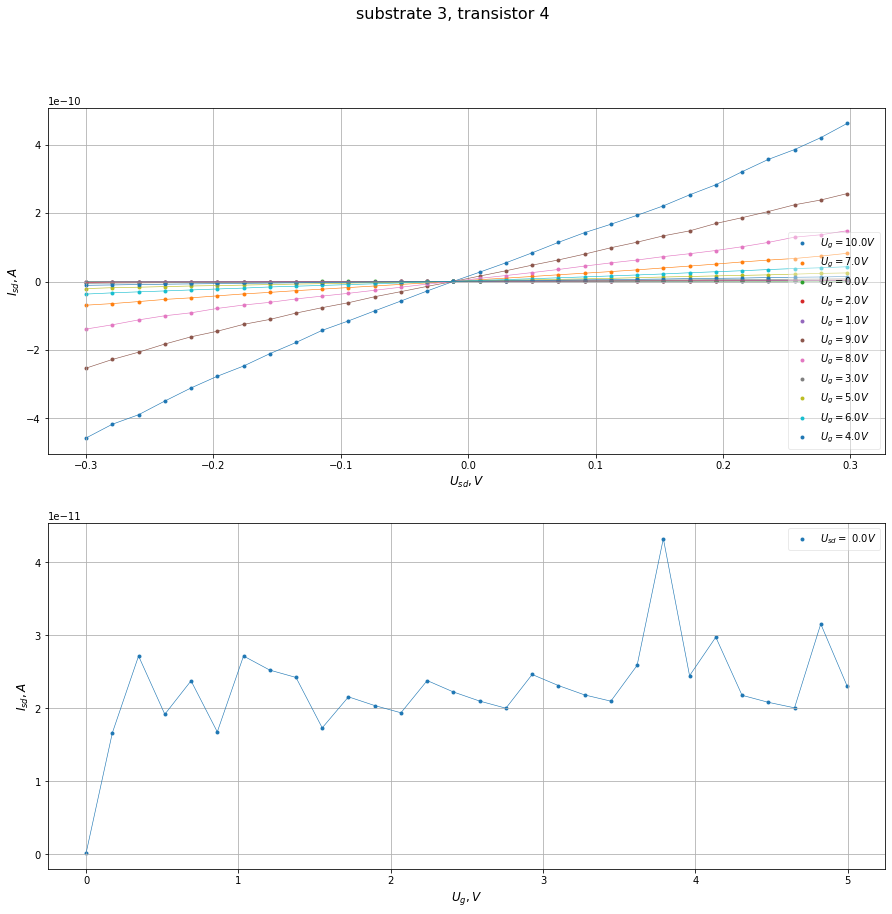

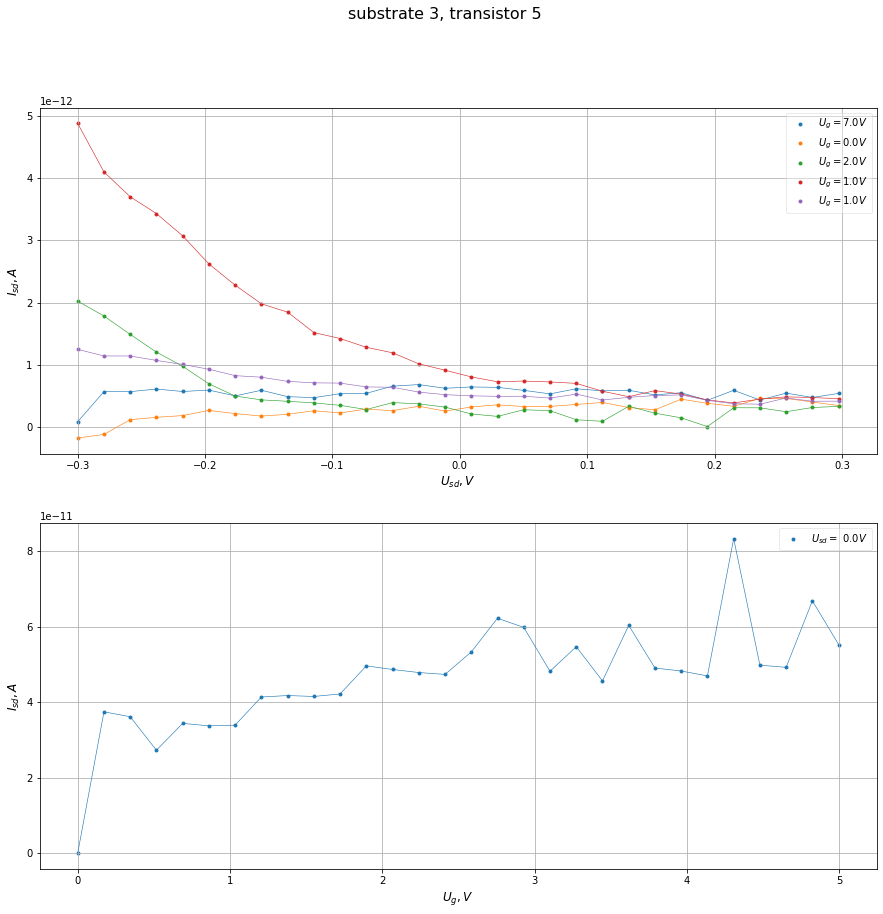

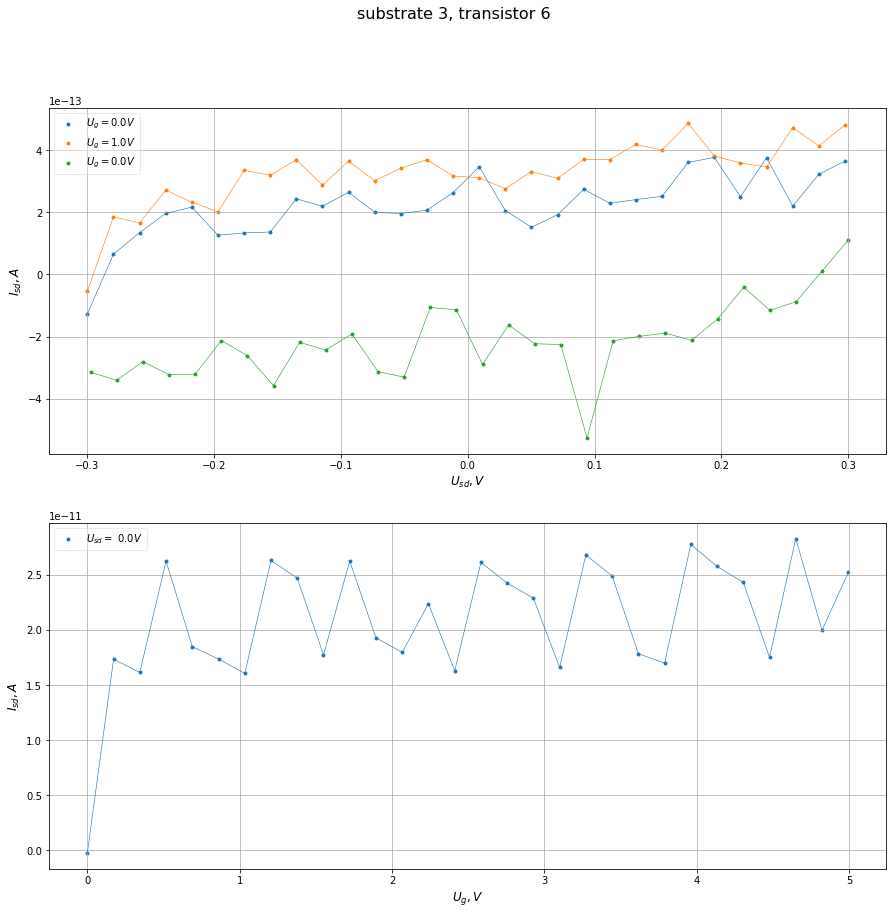

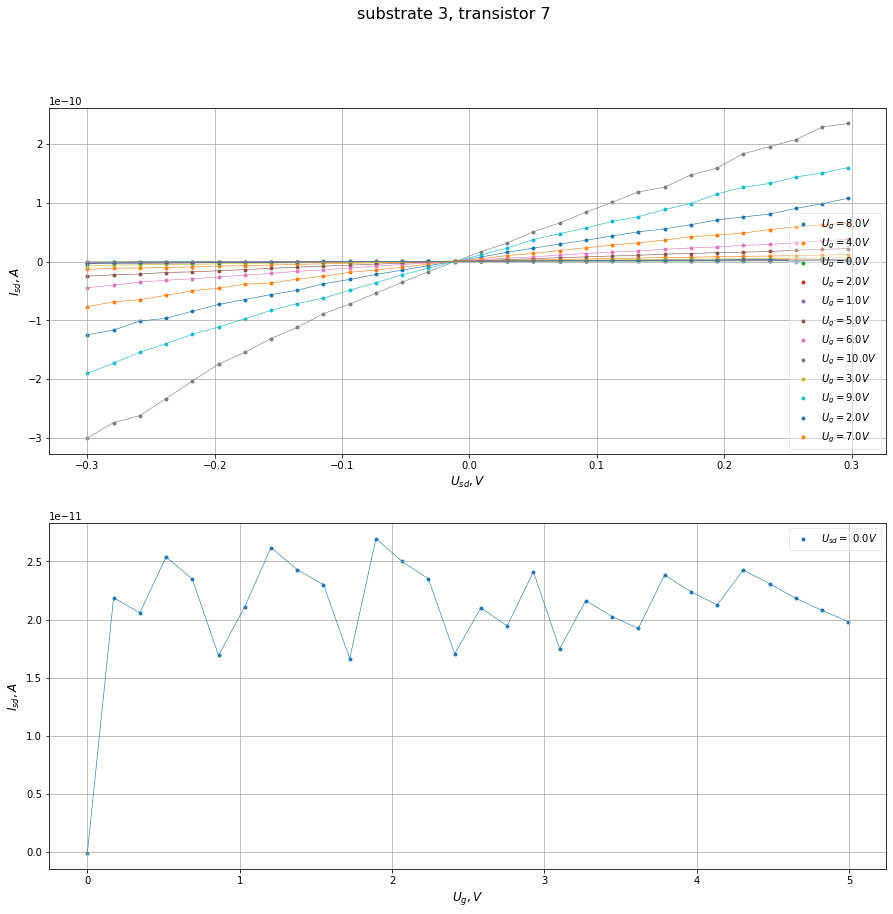

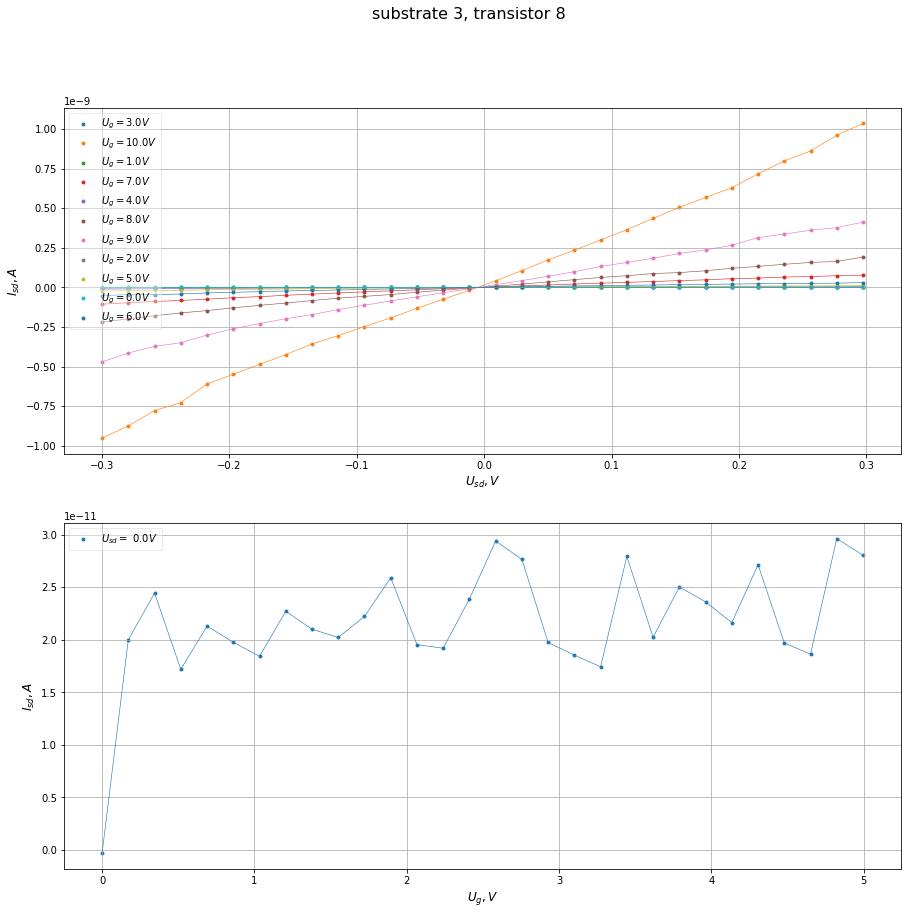

In [12]:
for (root, dirs, files) in os.walk(ROOT, topdown = True):
    df = data_frame(root, files)
    grouped = df.groupby(['substrate', 'transistor']).agg({'path':'unique'})
    grouped = grouped.reset_index()
    grouped.head()
    for item in range(0, grouped.shape[0]):
            print(grouped.loc[[item]])
            x = []
            y = []
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))
            ax1.set_xlabel("$U_{sd}, V$", fontsize=12)
            ax1.set_ylabel("$I_{sd}, A$", fontsize=12)
            ax2.set_xlabel("$U_{g}, V$", fontsize=12)
            ax2.set_ylabel("$I_{sd}, A$", fontsize=12)
            for i, path in enumerate(grouped['path'][item]):
                    if V_type(grouped['path'][item][i]) == 'Vsd':
                        x, y = read_data(path)
                        voltage = gate_voltage(path)
                        label = f'$U_g = {voltage}V$'
                        ax1.scatter(x, y, label=label, linewidth=0.05, s=15)
                        ax1.plot(x, y, linewidth=0.6)
                        print(voltage)
                    if V_type(grouped['path'][item][i]) == 'Vg':
                        x, y = read_data(path)
                        voltage = sd_voltage(path)
                        label = '$U_{sd} =$' +f' {voltage}$V$'
                        ax2.scatter(x, y, label=label, linewidth=0.05, s=15)
                        ax2.plot(x, y, linewidth=0.6)
                        print(voltage) 
            ax1.legend(loc='best', framealpha=0.4)
            ax1.grid(True)
            ax2.legend(loc='best', framealpha=0.4)
            ax2.grid(True) 
            title = 'substrate ' + str(grouped['substrate'][item]) \
                         + ', transistor ' + str(grouped['transistor'][item])
            fig.suptitle(title, fontsize = 16)
            filename = IMAGE_ROOT + title.replace(' ', '_') + '.png'
            plt.savefig(filename, dpi=400)
            print(title)

# Только сорс-дрейн

  substrate transistor V_type  \
0         4          1     Vg   

                                                path  
0  [/home/alexander/JupyterLab/Measurments/Measur...  
  substrate transistor V_type  \
1         4          1    Vsd   

                                                path  
1  [/home/alexander/JupyterLab/Measurments/Measur...  
1.0
5.0
7.0
0.0
substrate 4, transistor 1
  substrate transistor V_type  \
2         4          2     Vg   

                                                path  
2  [/home/alexander/JupyterLab/Measurments/Measur...  
  substrate transistor V_type  \
3         4          2    Vsd   

                                                path  
3  [/home/alexander/JupyterLab/Measurments/Measur...  
5.0
0.0
6.0
4.0
3.0
1.0
2.0
substrate 4, transistor 2
  substrate transistor V_type  \
4         4          3     Vg   

                                                path  
4  [/home/alexander/JupyterLab/Measurments/Measur...  
  substrate transis

substrate 2, transistor 4
  substrate transistor V_type  \
8         2          5     Vg   

                                                path  
8  [/home/alexander/JupyterLab/Measurments/Measur...  
  substrate transistor V_type  \
9         2          5    Vsd   

                                                path  
9  [/home/alexander/JupyterLab/Measurments/Measur...  
5.0
4.0
0.0
3.0
2.0
1.0


<ipython-input-41-8de146397876>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(10,6))


substrate 2, transistor 5
   substrate transistor V_type  \
10         2          6     Vg   

                                                 path  
10  [/home/alexander/JupyterLab/Measurments/Measur...  
   substrate transistor V_type  \
11         2          6    Vsd   

                                                 path  
11  [/home/alexander/JupyterLab/Measurments/Measur...  
0.0
2.0
6.0
5.0
1.0
10.0
3.0
4.0
9.0
8.0
7.0
substrate 2, transistor 6
   substrate transistor V_type  \
12         2          7     Vg   

                                                 path  
12  [/home/alexander/JupyterLab/Measurments/Measur...  
   substrate transistor V_type  \
13         2          7    Vsd   

                                                 path  
13  [/home/alexander/JupyterLab/Measurments/Measur...  
0.0
5.0
1.0
2.0
substrate 2, transistor 7
   substrate transistor V_type  \
14         2          8     Vg   

                                                 path  
14  [/home/a

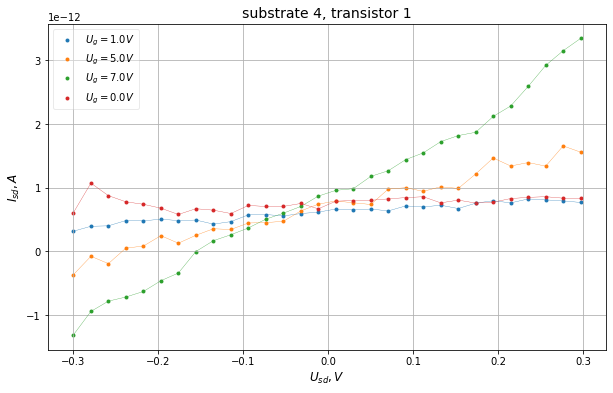

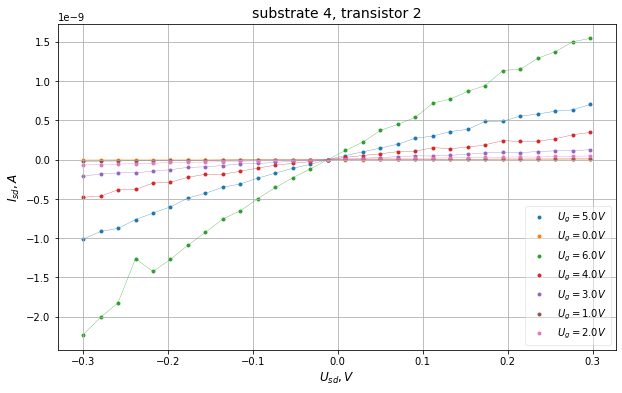

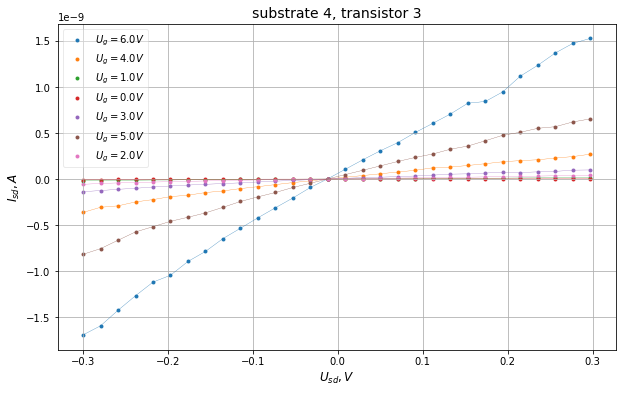

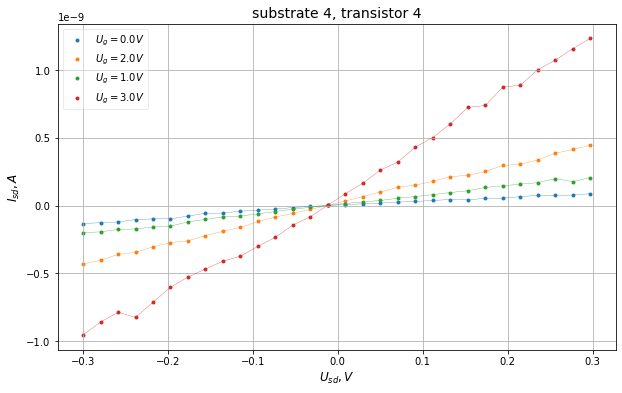

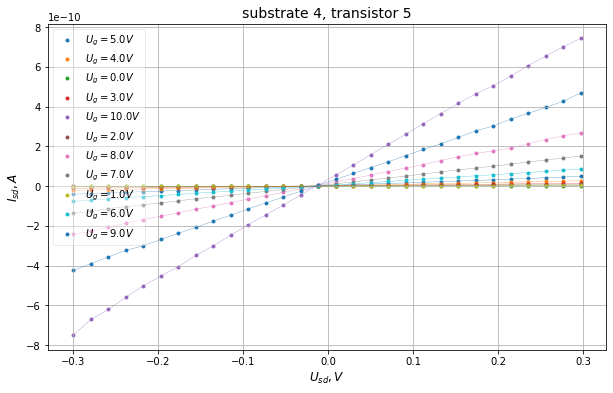

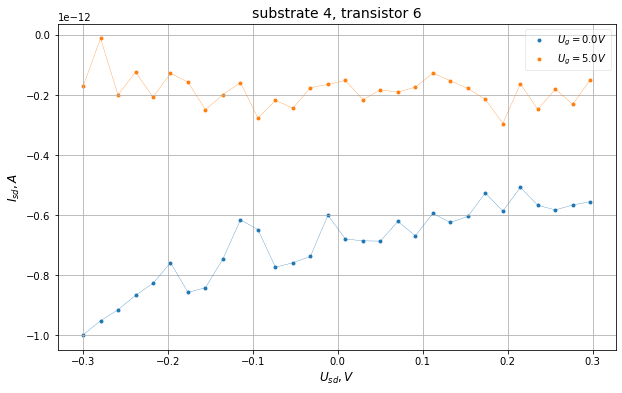

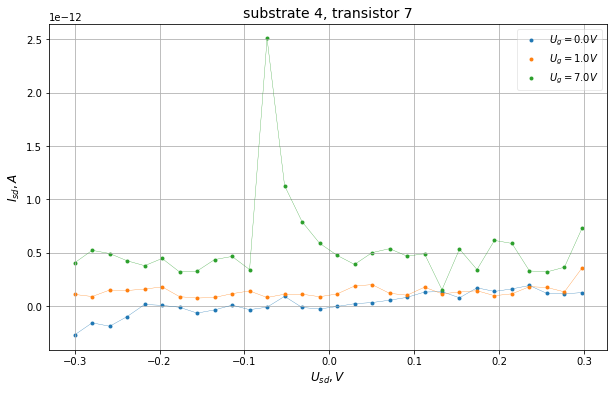

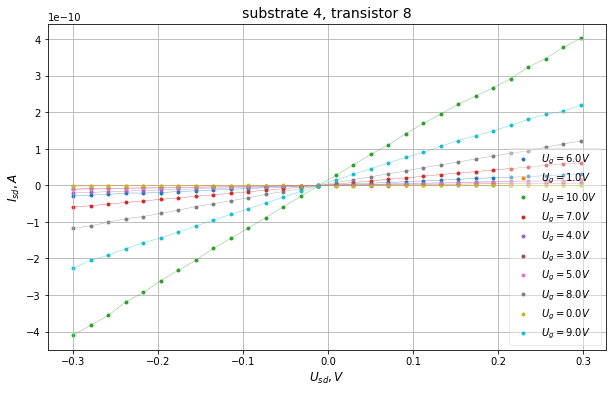

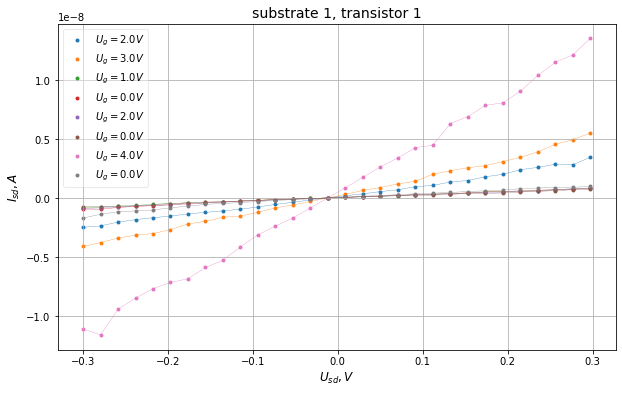

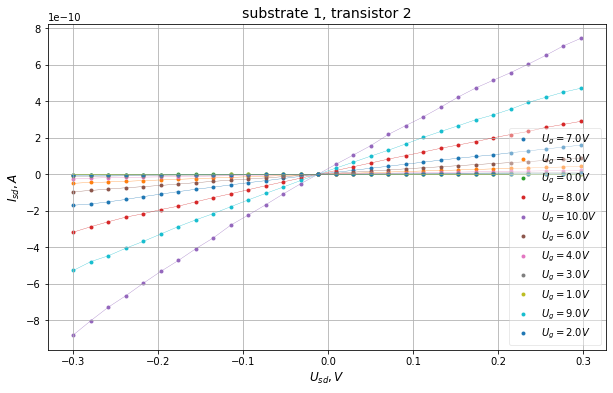

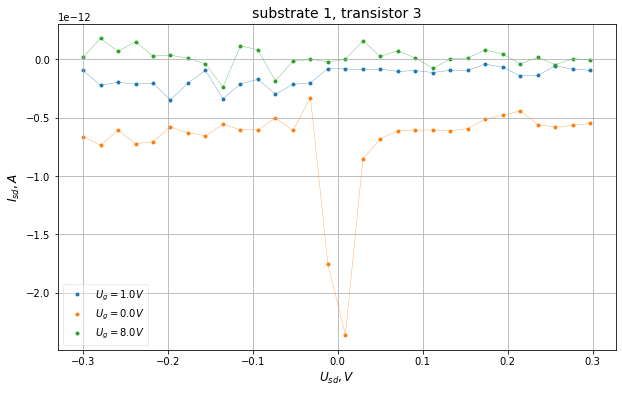

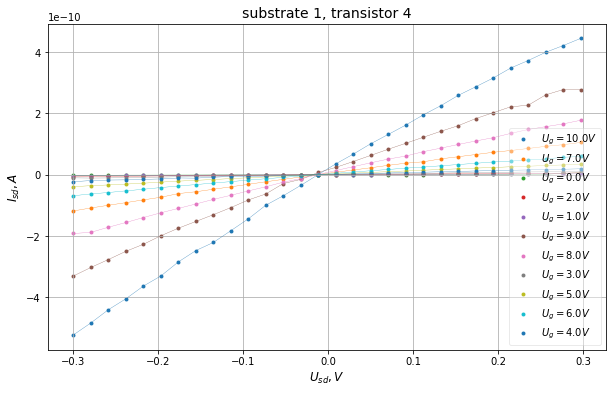

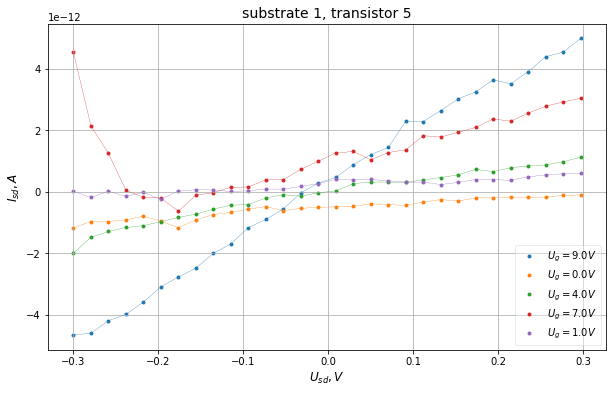

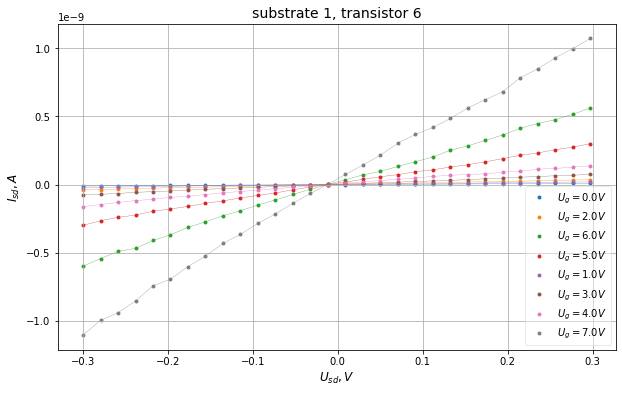

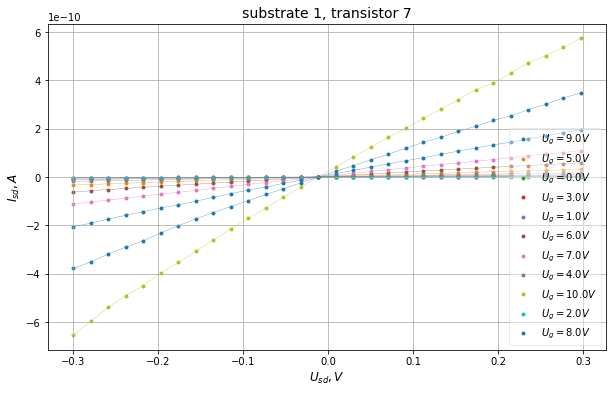

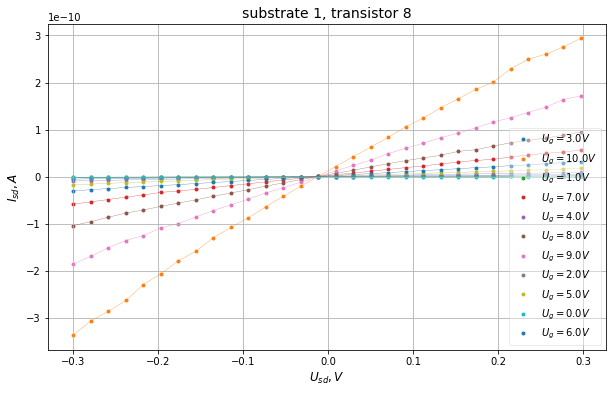

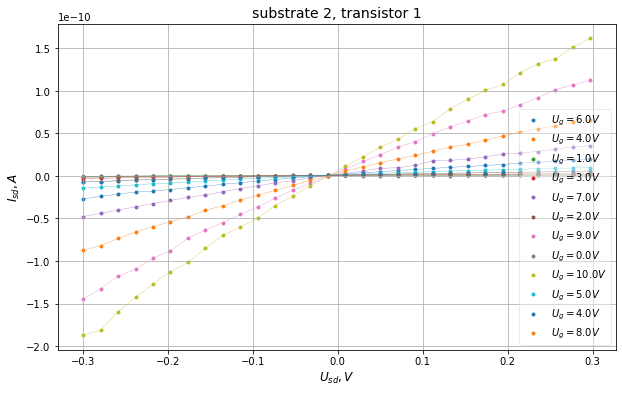

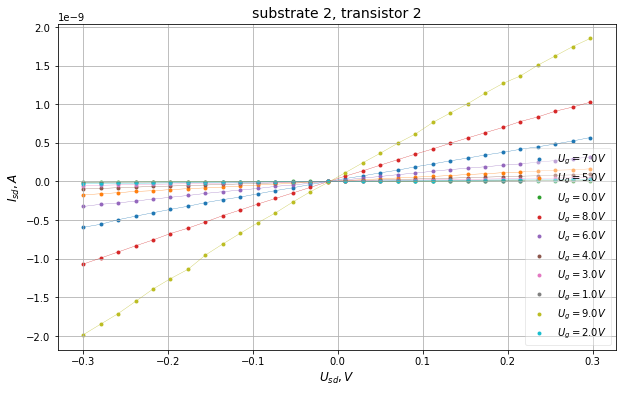

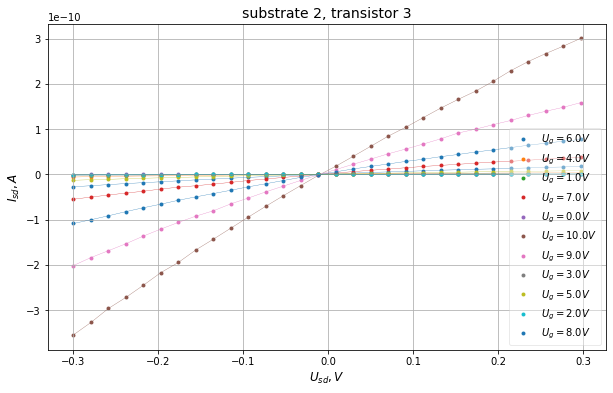

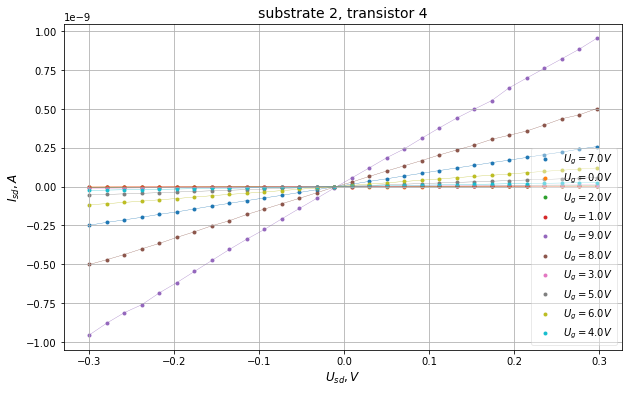

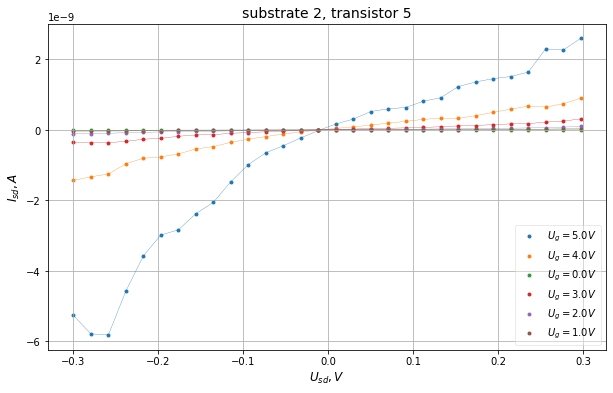

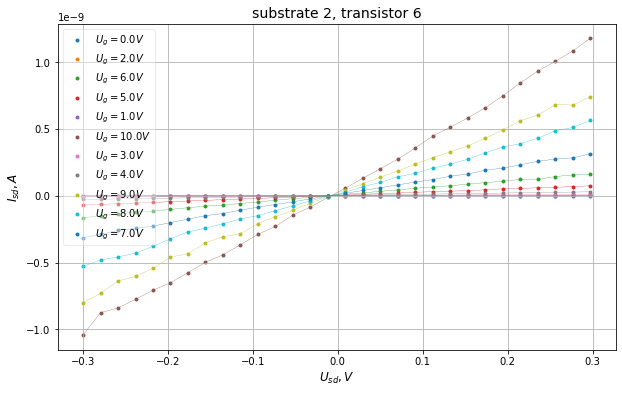

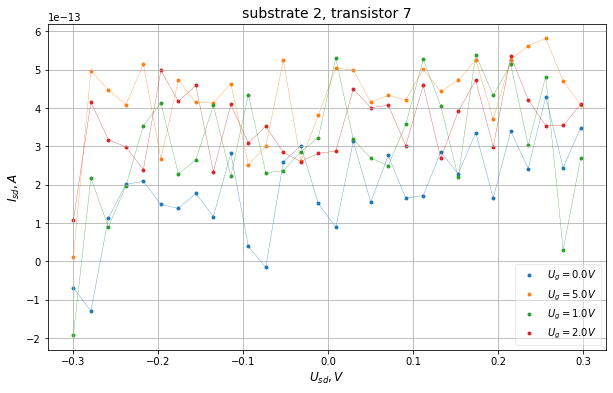

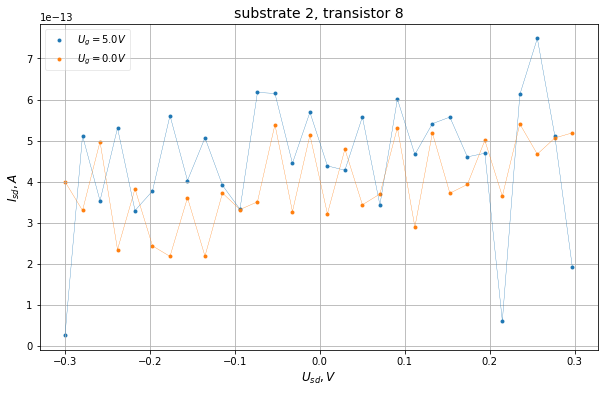

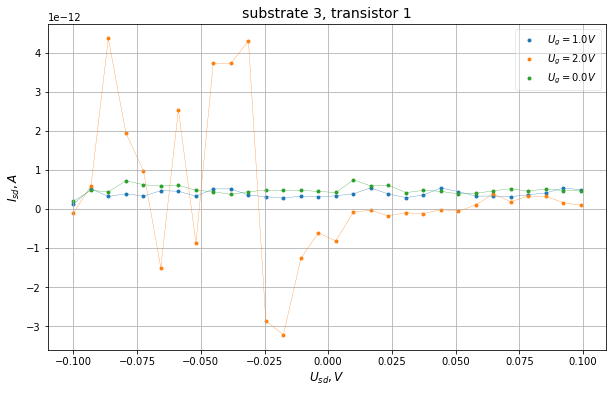

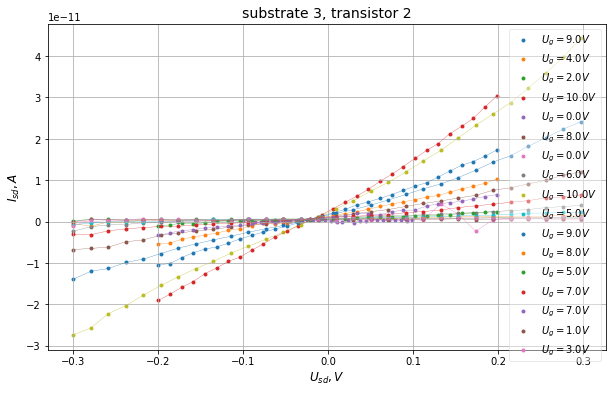

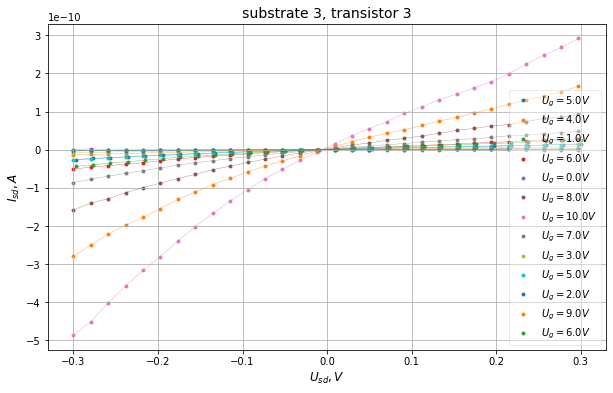

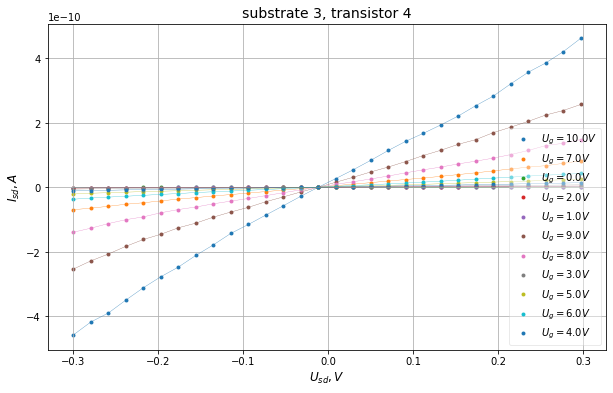

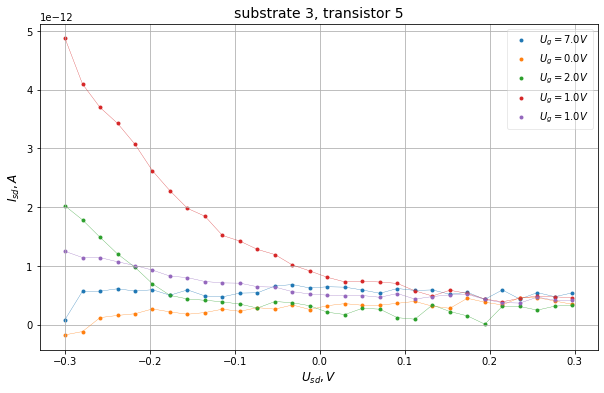

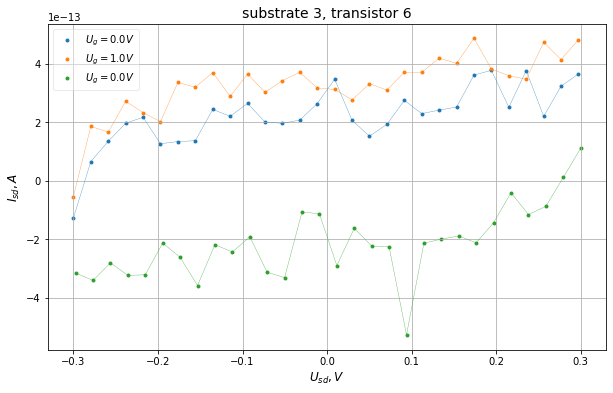

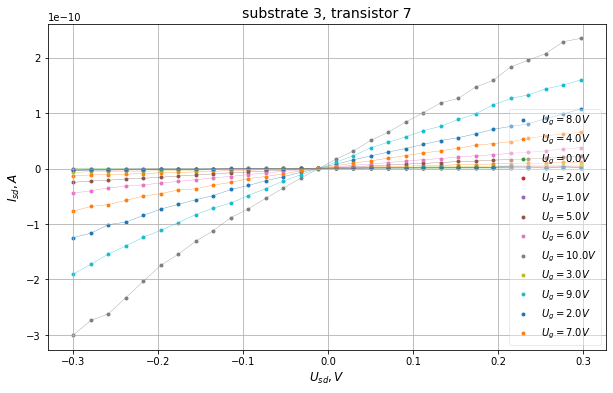

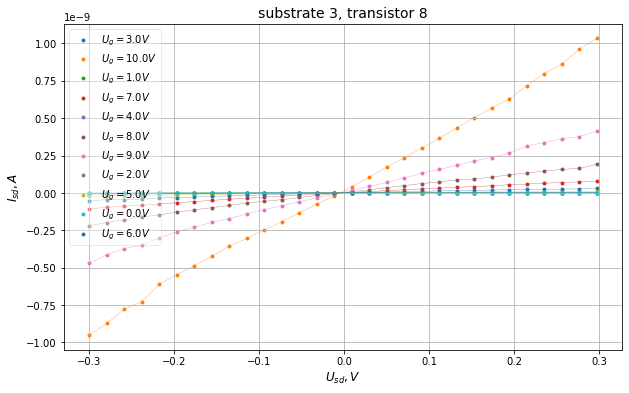

In [41]:
for (root, dirs, files) in os.walk(ROOT, topdown = True):
    df = data_frame(root, files)
    grouped = df.groupby(['substrate', 'transistor', 'V_type']).agg({'path':'unique'})
    grouped = grouped.reset_index()
    for item in range(0, grouped.shape[0]):
        print(grouped.loc[[item]])
        x = []
        y = []
        if grouped['V_type'][item] == 'Vsd':
            fig, ax1 = plt.subplots(figsize=(10,6))
            title = 'substrate ' + str(grouped['substrate'][item]) \
                  + ', transistor ' + str(grouped['transistor'][item]) 
            plt.title(title, fontsize=14)
            plt.xlabel("$U_{sd}, V$", fontsize=12)
            plt.ylabel("$I_{sd}, A$", fontsize=12)
            for i, path in enumerate(grouped['path'][item]):
                x, y = read_data(path)
                voltage = gate_voltage(path)
                label = f'$U_g = {voltage}V$'
                plt.scatter(x, y, label=label, linewidth=0.05, s=15)
                plt.plot(x, y, linewidth=0.3)
                print(voltage)
            plt.legend(loc='best', framealpha=0.4)
            plt.grid(True)
            filename = IMAGE_ROOT + title.replace(' ', '_') + '.png'
            plt.savefig(filename, dpi=300)
            print(title)